In [5]:
# from gspan_mining.config import parser
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function

# import os
# from random import random
# import sys

# from gspan_mining.config import parser
# from gspan_mining.ceb_gspan import gSpan
# import numpy as np
# import pandas as pd


# import random 
# graphnum =10
# def generate_graph(graphnum):
#     graph = []
#     vertexes = []
#     edges = []
#     # graph
#     for g_id in range(graphnum):
#         #vertex
#         rand_v = int(random.random()*100)
#         if rand_v<=10:continue
#         for v in range(rand_v):
#             graph.append(str(g_id)+str(0))
#             vertexes.append(str(g_id)+str(v))
        
#         rand_e = int(random.random()*rand_v*rand_v)
#         for e in range(rand_e):
#             src = int(random.random()*rand_v)
#             dst = int(random.random()*rand_v)
#             if src!=dst:
#                 edges.append([g_id,str(g_id)+str(src),str(g_id)+str(dst)])

#     df_vertex = pd.DataFrame({"graph_id":graph, "id":vertexes})
#     df_vertex["node_label_0"] = np.random.randint(0,2,size=(len(vertexes),1))
#     df_vertex["node_label_1"] = np.random.randint(0,2,size=(len(vertexes),1))
#     df_edge = pd.DataFrame(np.array(edges),columns=["group_id",'src', 'dst'])
#     df_edge["edge_type"] = np.random.randint(0,6,size=(len(edges),1))

#     return df_vertex, df_edge

# df_vertex, df_edge  = generate_graph(50)
# df_vertex.to_csv("data/vertexes.csv")
# df_edge[['src', 'dst','edge_type']].to_csv("data/edges.csv")

In [1]:
from gspan_mining.config import parser
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
from random import random
import sys

from gspan_mining.config import parser
from gspan_mining.ceb_gspan import gSpan

import numpy as np
import pandas as pd


import random 
def main(FLAGS=None):
    """Run gSpan."""

    if FLAGS is None:
        FLAGS, _ = parser.parse_known_args(args=["graphdata/graph.data.5"])

    if not os.path.exists(FLAGS.database_file_name):
        print('{} does not exist.'.format(FLAGS.database_file_name))
        sys.exit()

    graph_dict = {"group_id":"graph_id","vertex_id":"id","edge_src":"src_id","edge_dst":"dst_id"}
    gs = gSpan(
        database_file_name=FLAGS.database_file_name,
        min_support=FLAGS.min_support,
        min_num_vertices=FLAGS.lower_bound_of_num_vertices,
        max_num_vertices=FLAGS.upper_bound_of_num_vertices,
        max_ngraphs=FLAGS.num_graphs,
        is_undirected=(not FLAGS.directed),
        verbose=FLAGS.verbose,
        visualize=FLAGS.plot,
        where=FLAGS.where,
        graph_dict = graph_dict
    )

    gs.run()
    gs.time_stats()

    
    return gs


if __name__ == '__main__':
    args_str = '-s 2 -d True -l 5 -p True -w True data/'
    FLAGS, _ = parser.parse_known_args(args=args_str.split())
    main(FLAGS)


100%|██████████| 41/41 [00:00<00:00, 80.81it/s]


g  130  not get  117 
 g.vertices: <built-in method keys of dict object at 0x7fc4f060f8c0>
g  130  not get  117 
 g.vertices: <built-in method keys of dict object at 0x7fc4f060f8c0>
g  130  not get  127 
 g.vertices: <built-in method keys of dict object at 0x7fc4f060f8c0>
g  130  not get  127 
 g.vertices: <built-in method keys of dict object at 0x7fc4f060f8c0>
g  370  not get  343 
 g.vertices: <built-in method keys of dict object at 0x7fc4eecea6c0>
g  370  not get  343 
 g.vertices: <built-in method keys of dict object at 0x7fc4eecea6c0>
g  370  not get  343 
 g.vertices: <built-in method keys of dict object at 0x7fc4eecea6c0>
g  370  not get  343 
 g.vertices: <built-in method keys of dict object at 0x7fc4eecea6c0>
g  490  not get  478 
 g.vertices: <built-in method keys of dict object at 0x7fc4f16428c0>
g  490  not get  478 
 g.vertices: <built-in method keys of dict object at 0x7fc4f16428c0>
g  490  not get  478 
 g.vertices: <built-in method keys of dict object at 0x7fc4f16428c0>

KeyError: 110

In [4]:
%pylab inline
gs = main(FLAGS)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/tangting/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## plot graphs in database

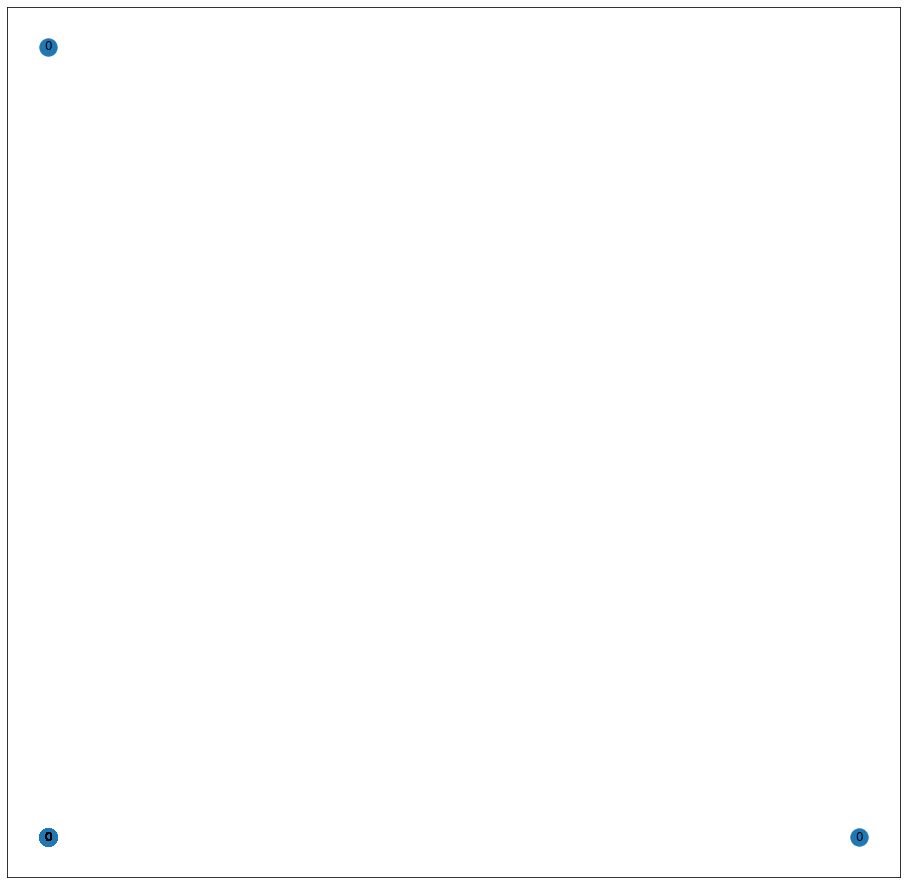

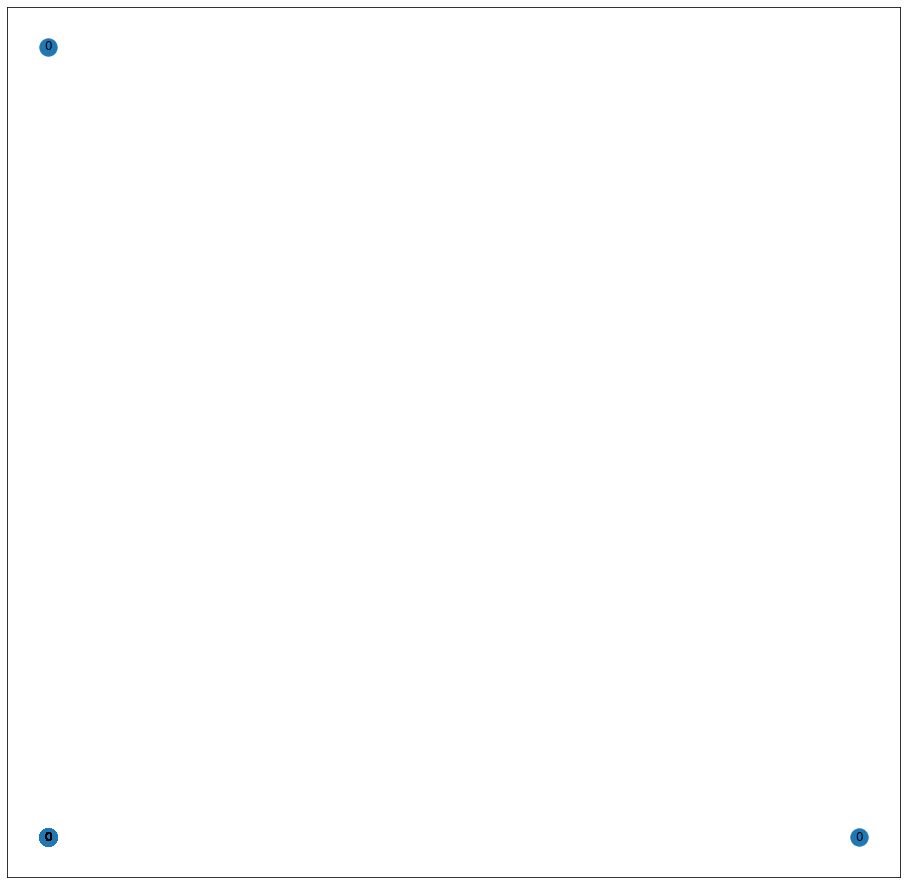

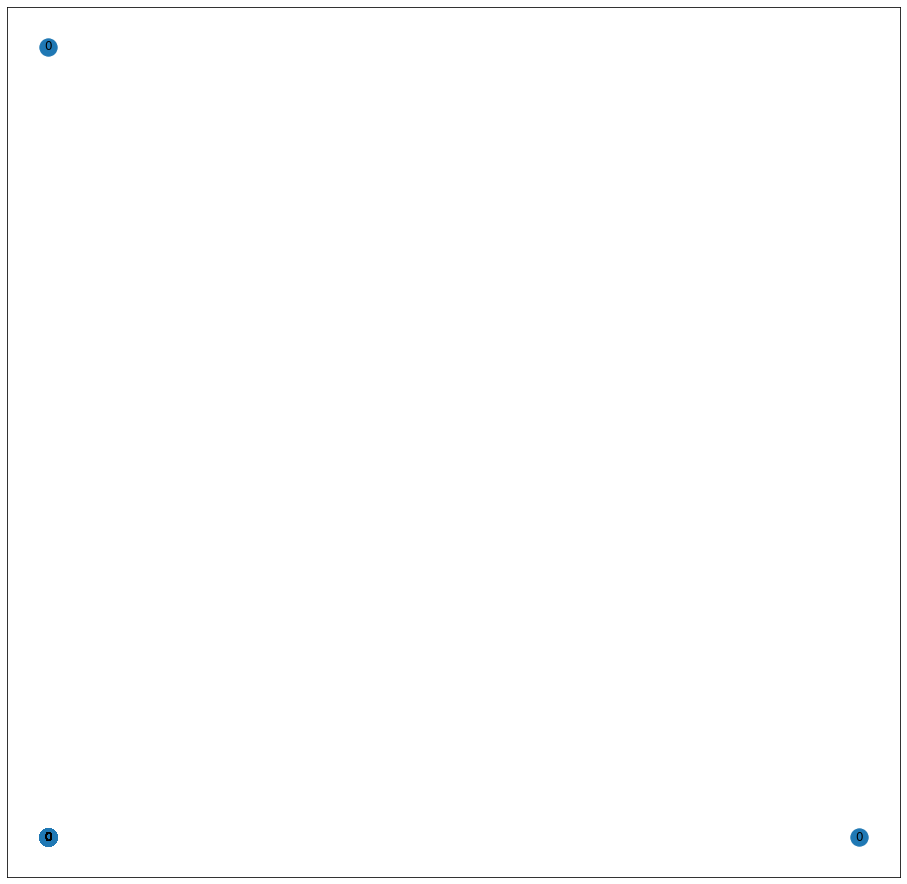

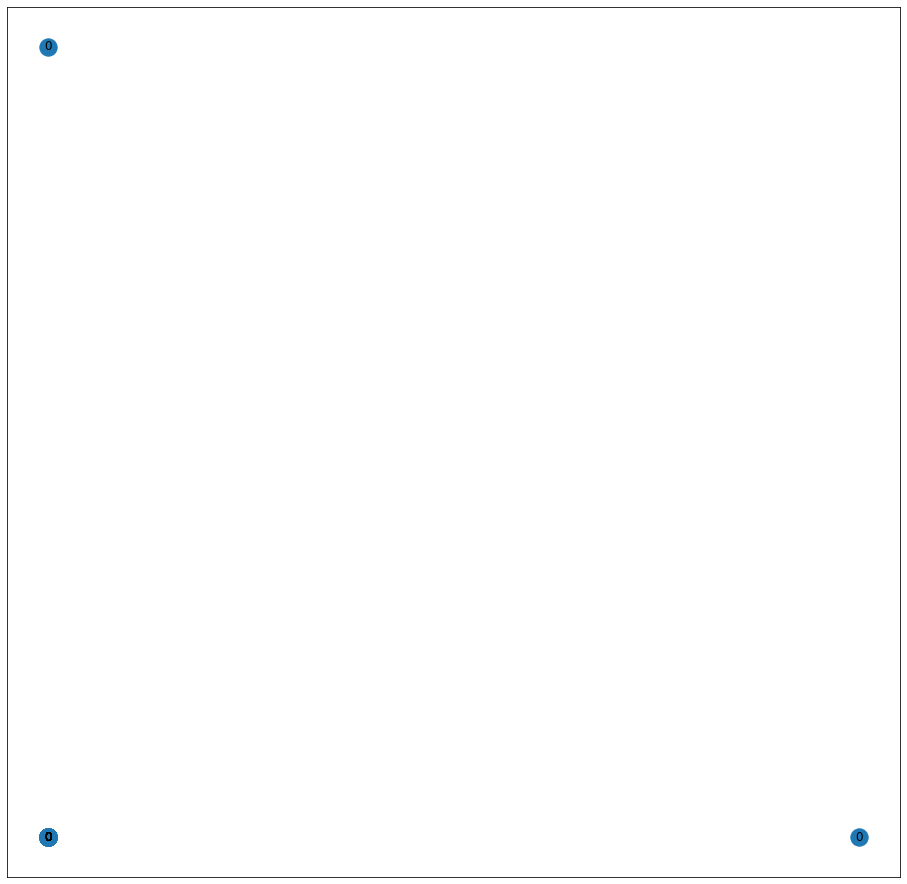

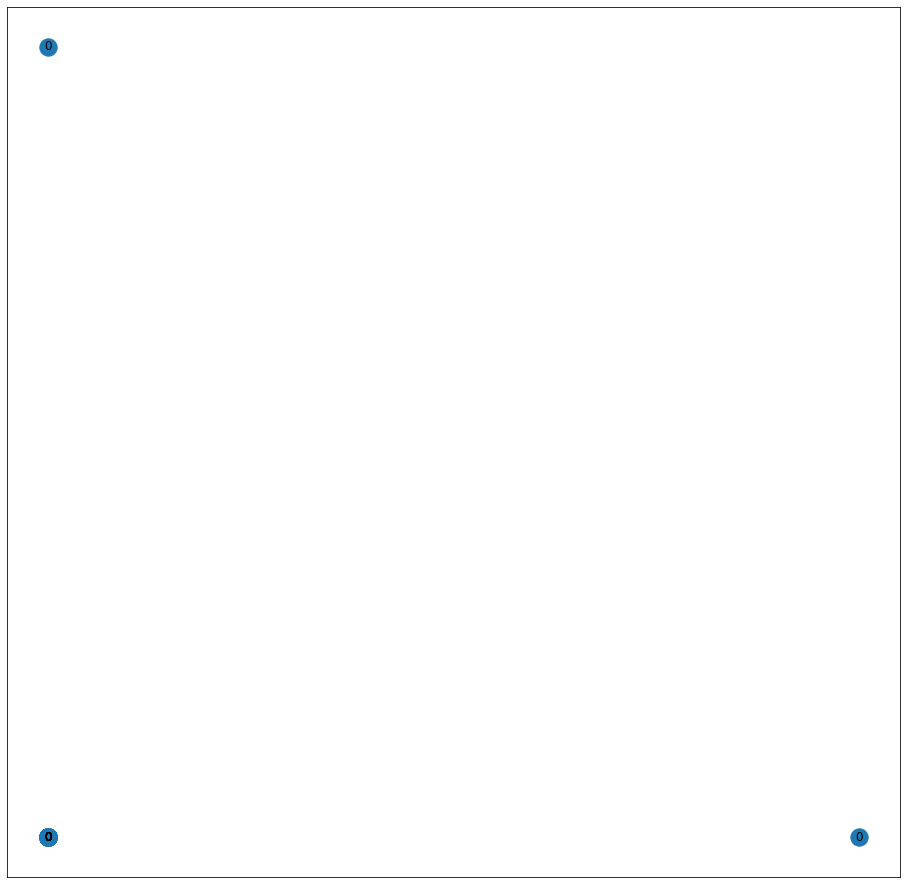

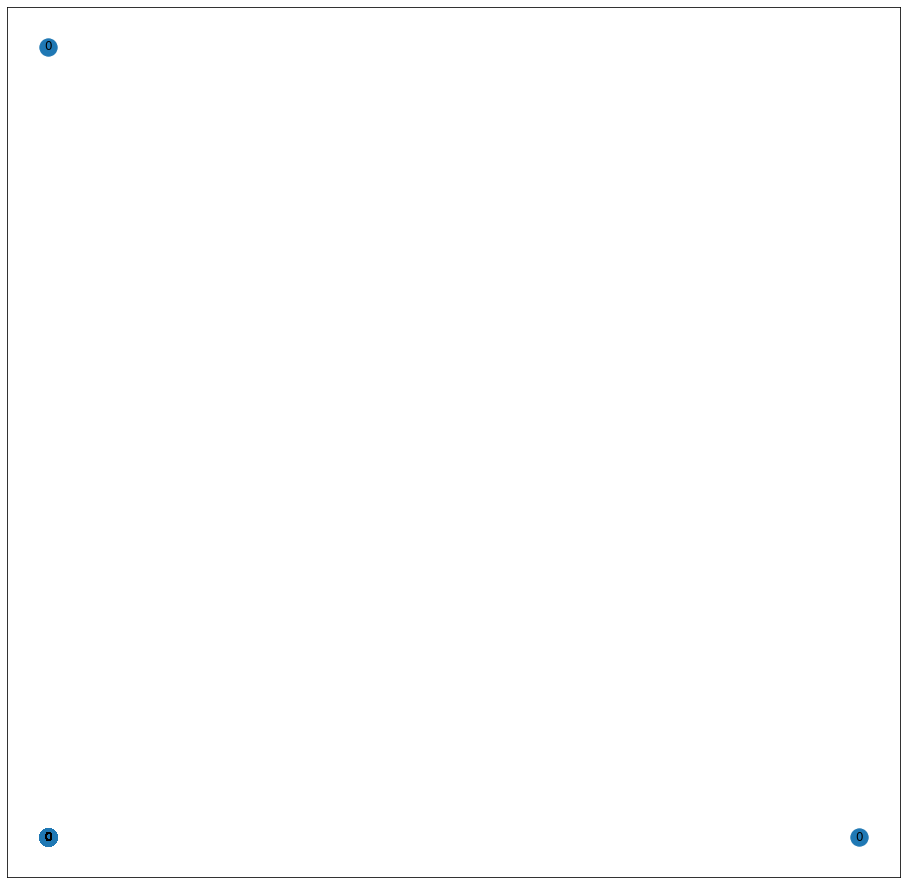

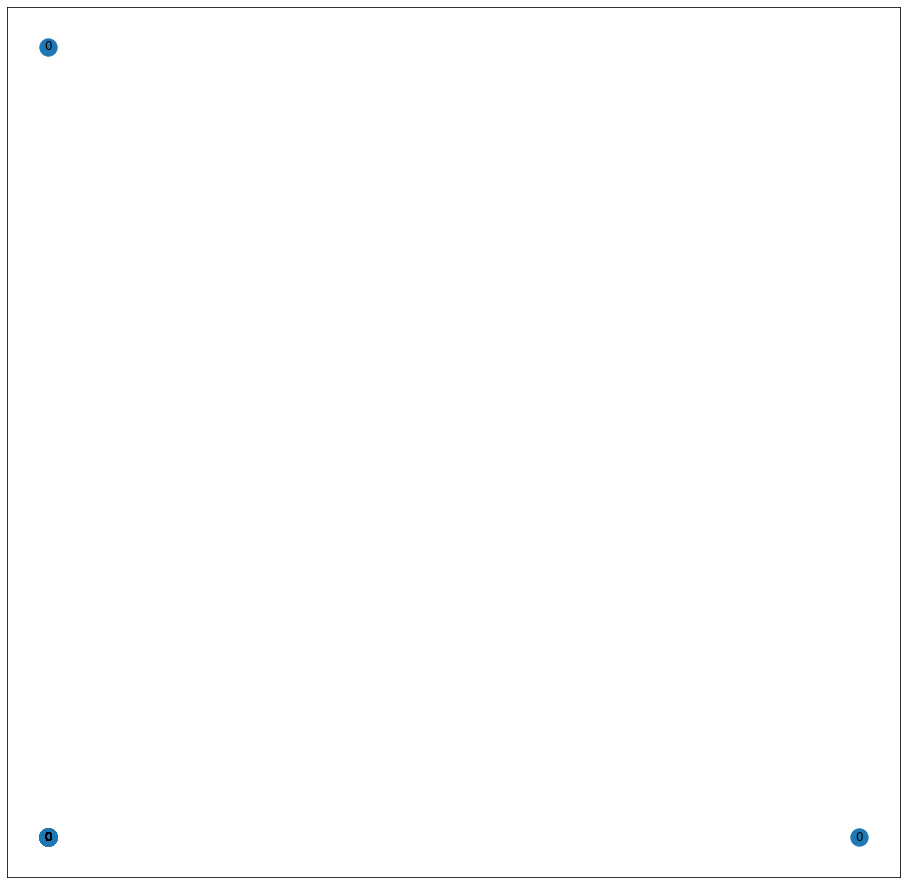

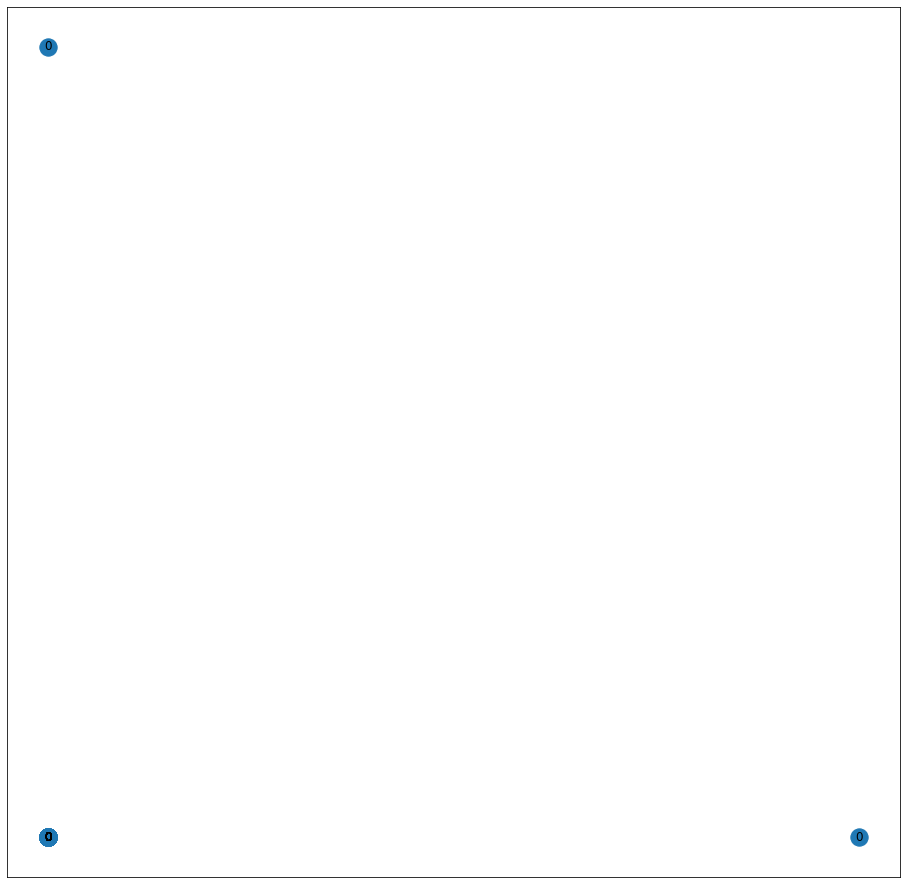

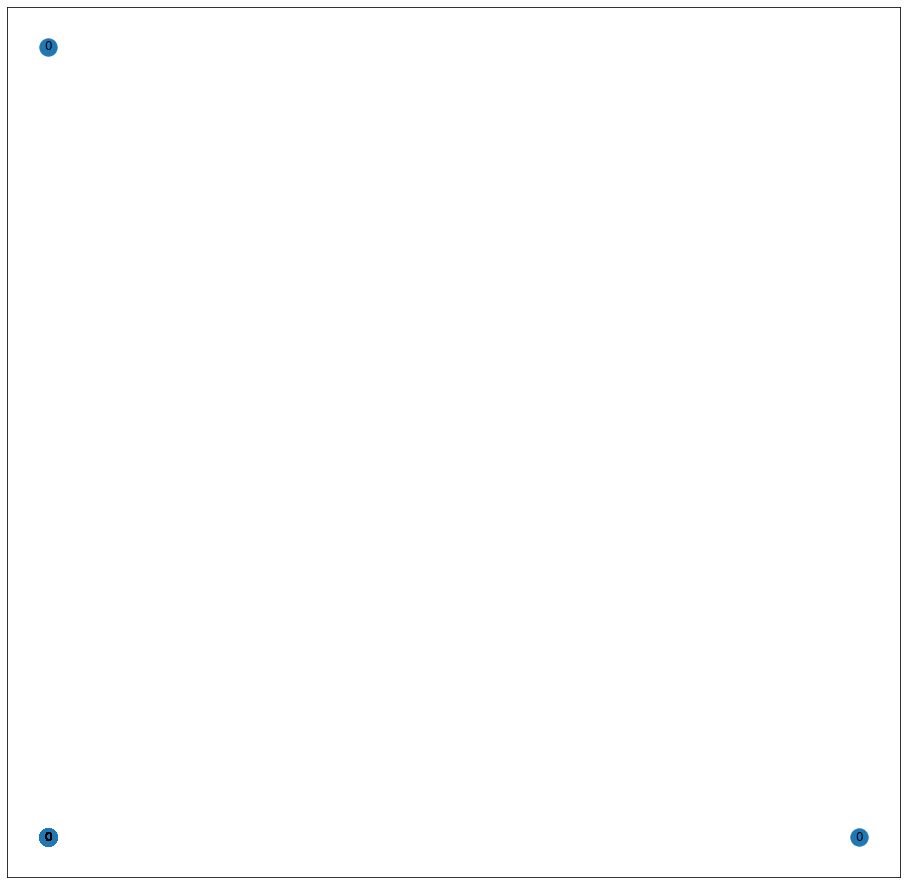

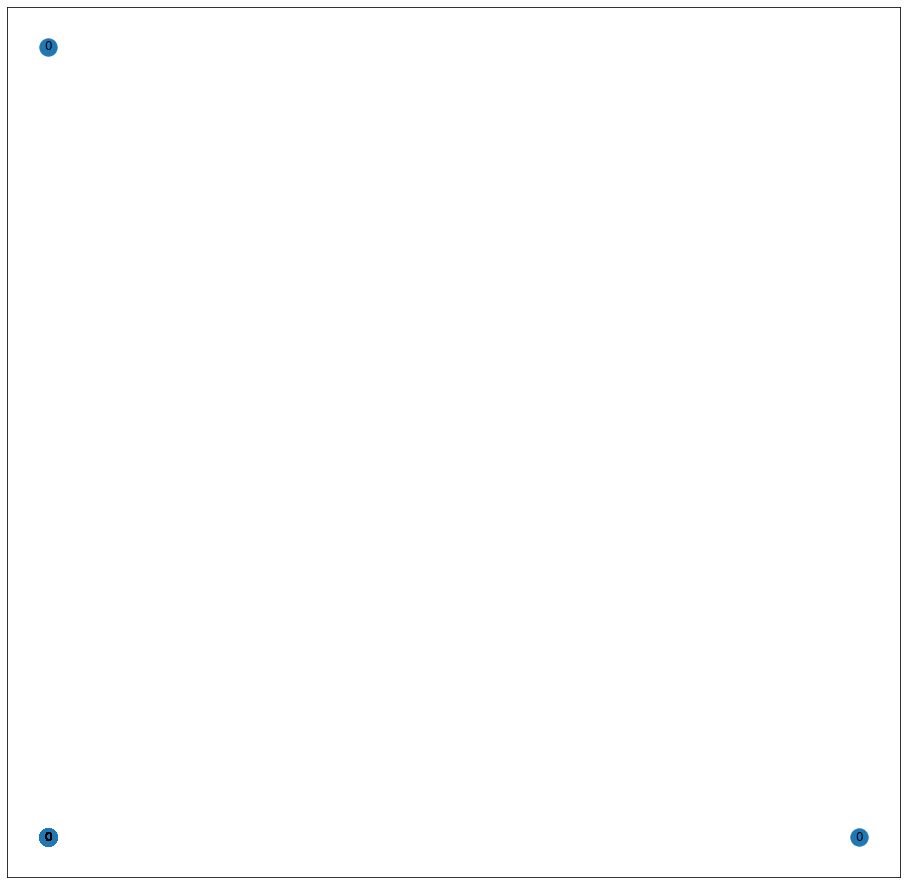

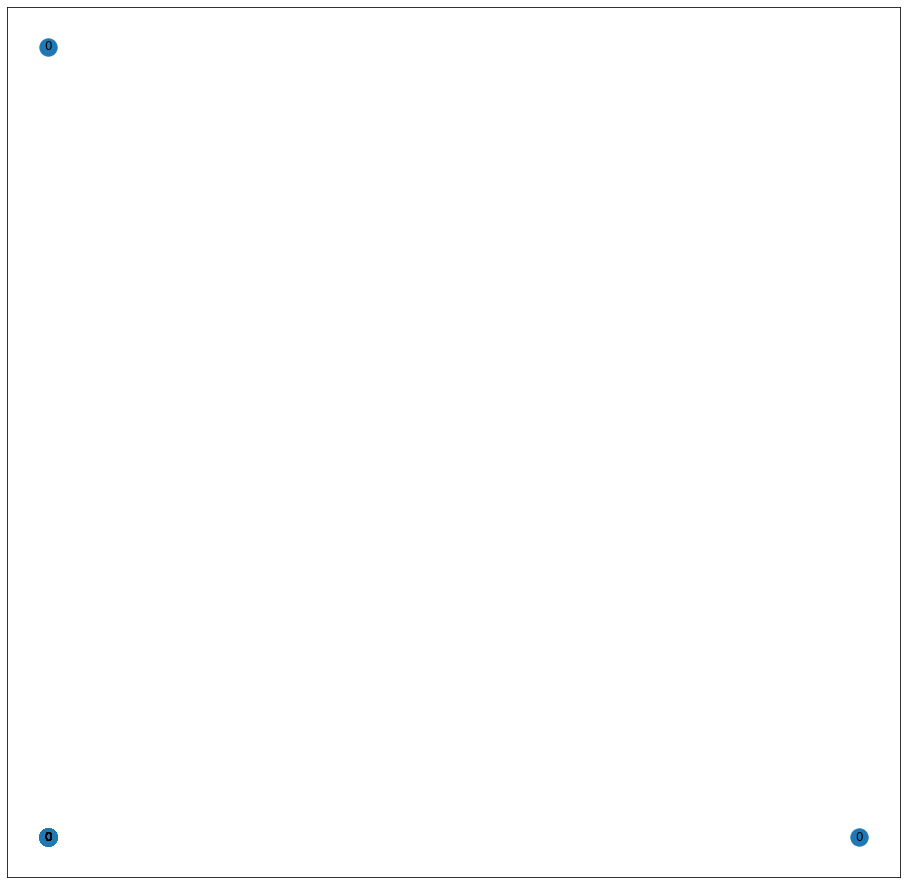

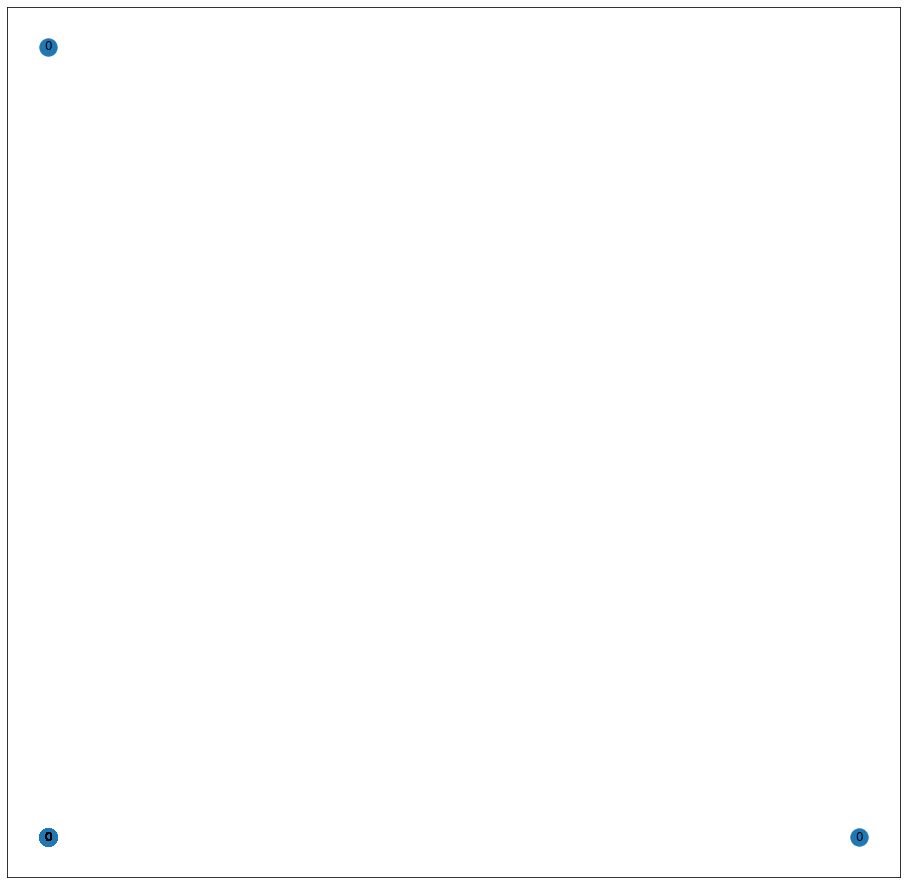

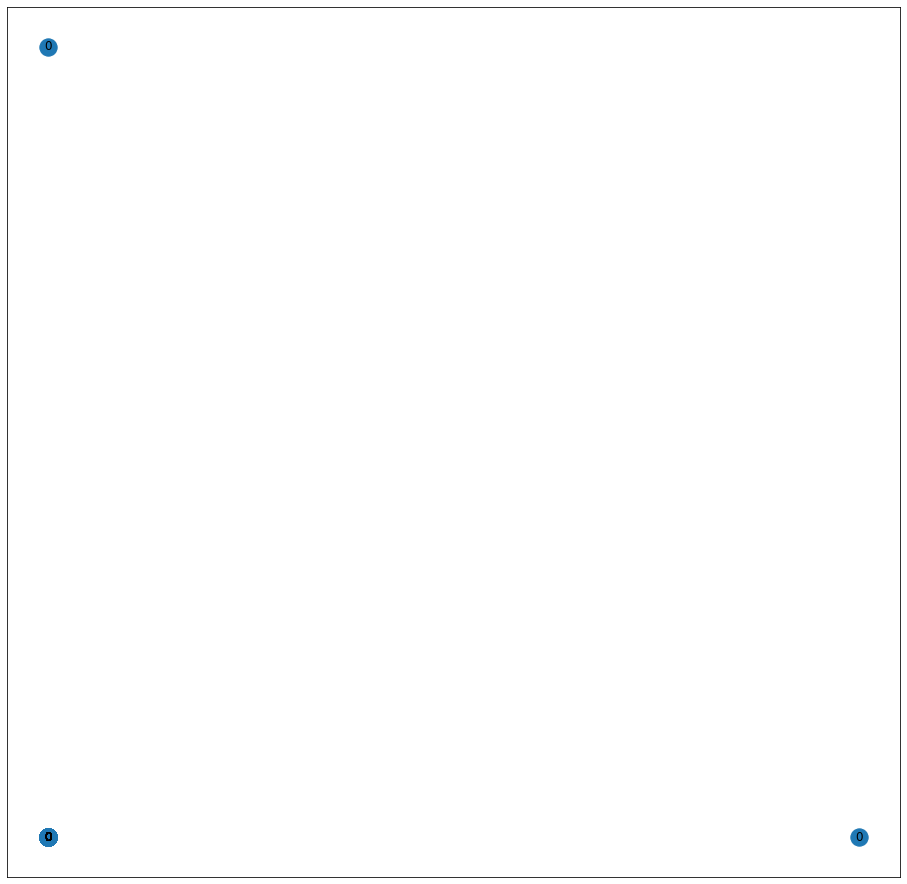

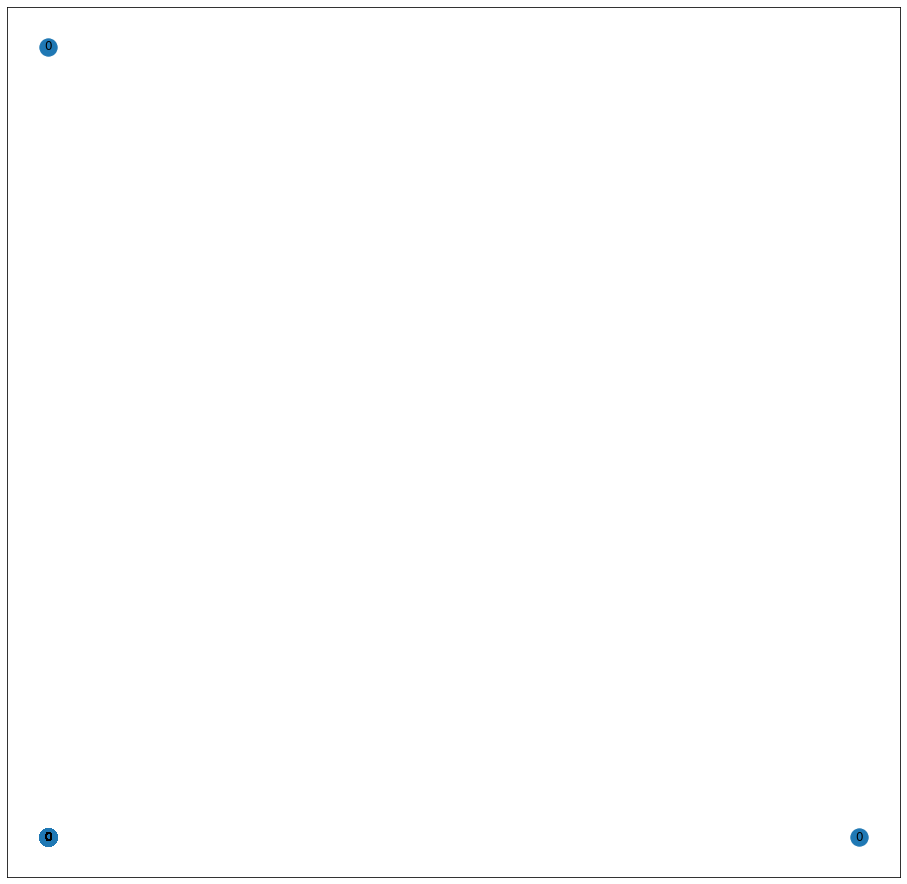

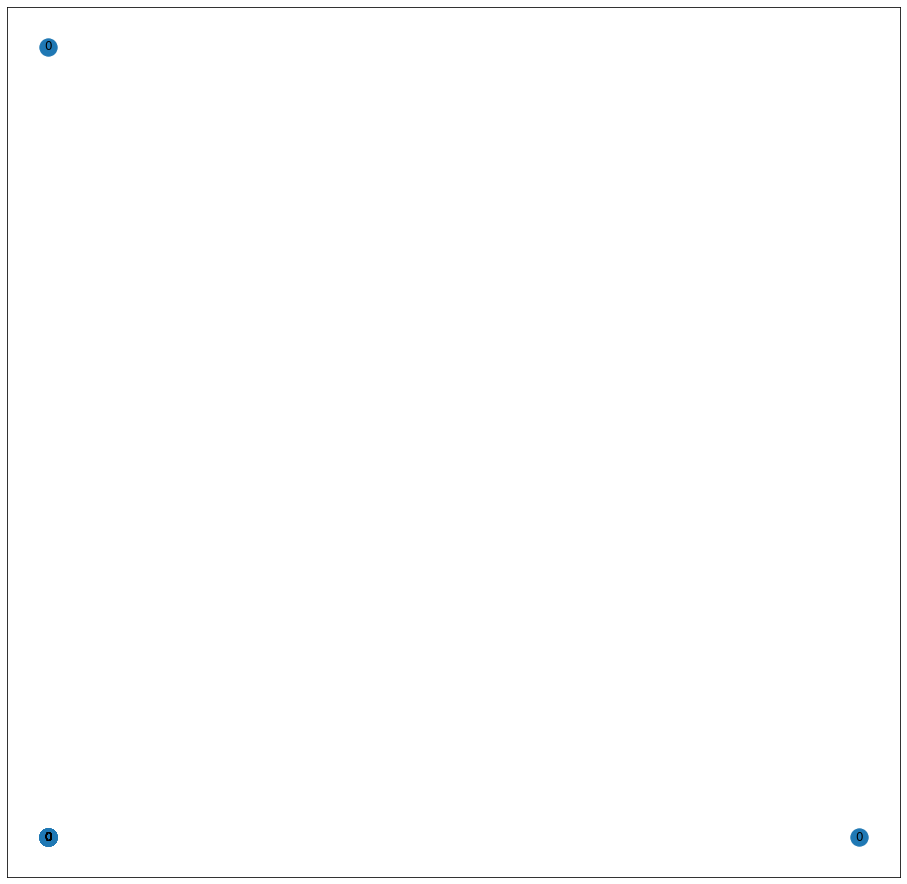

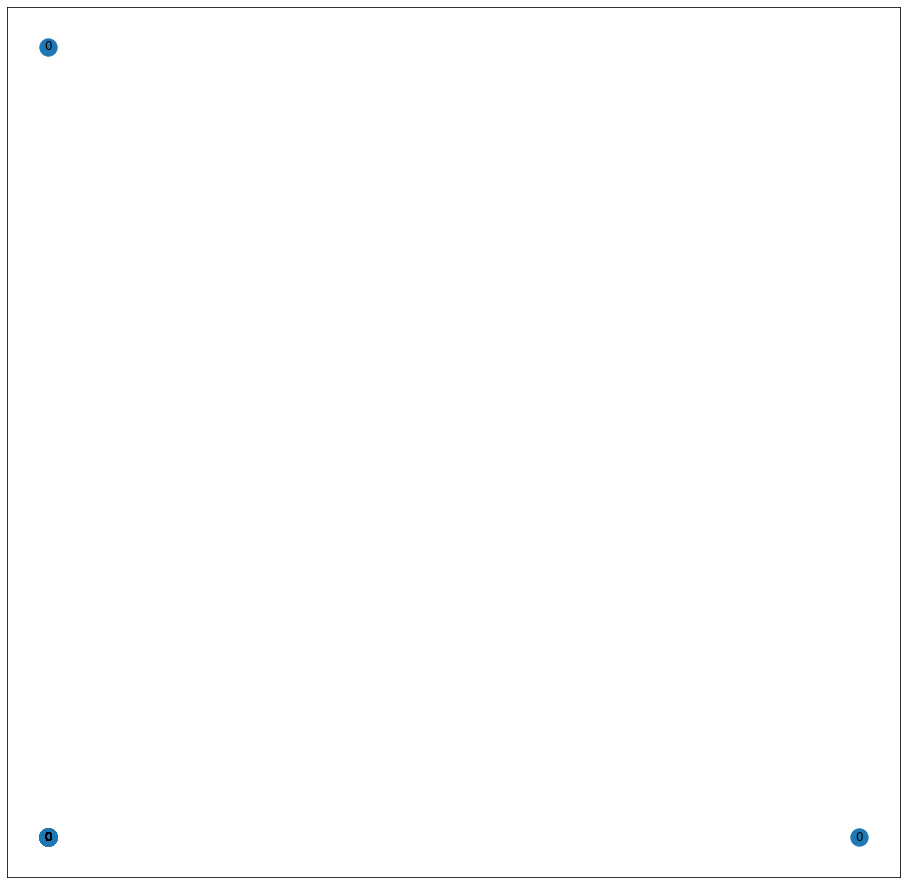

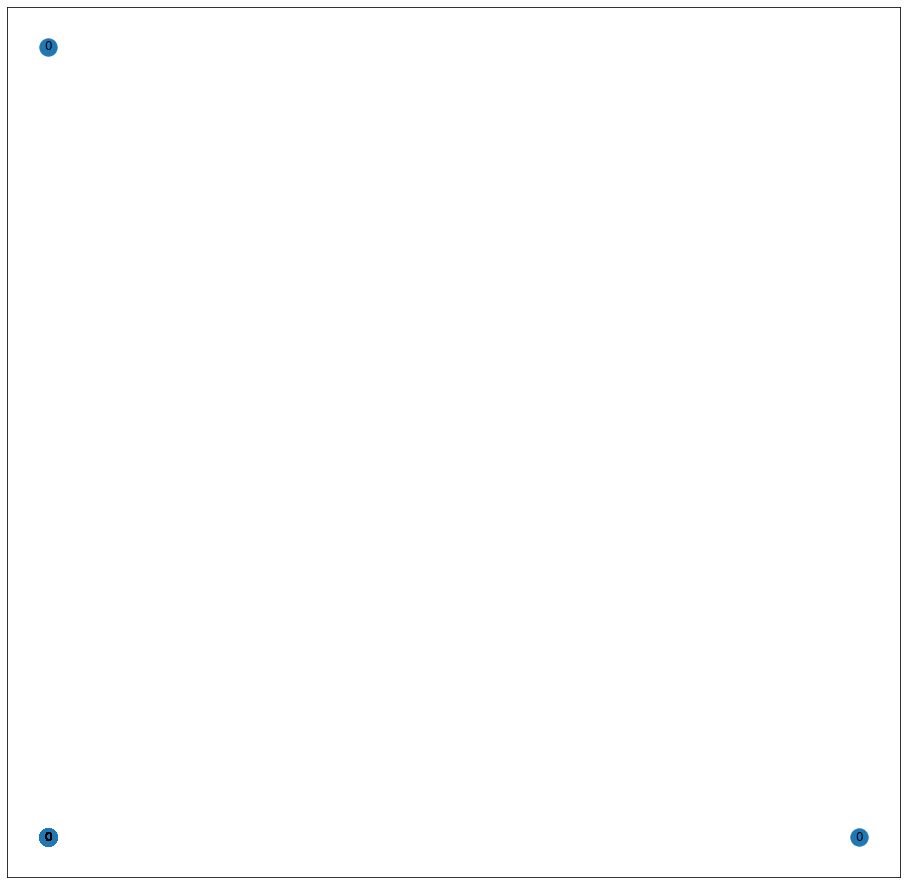

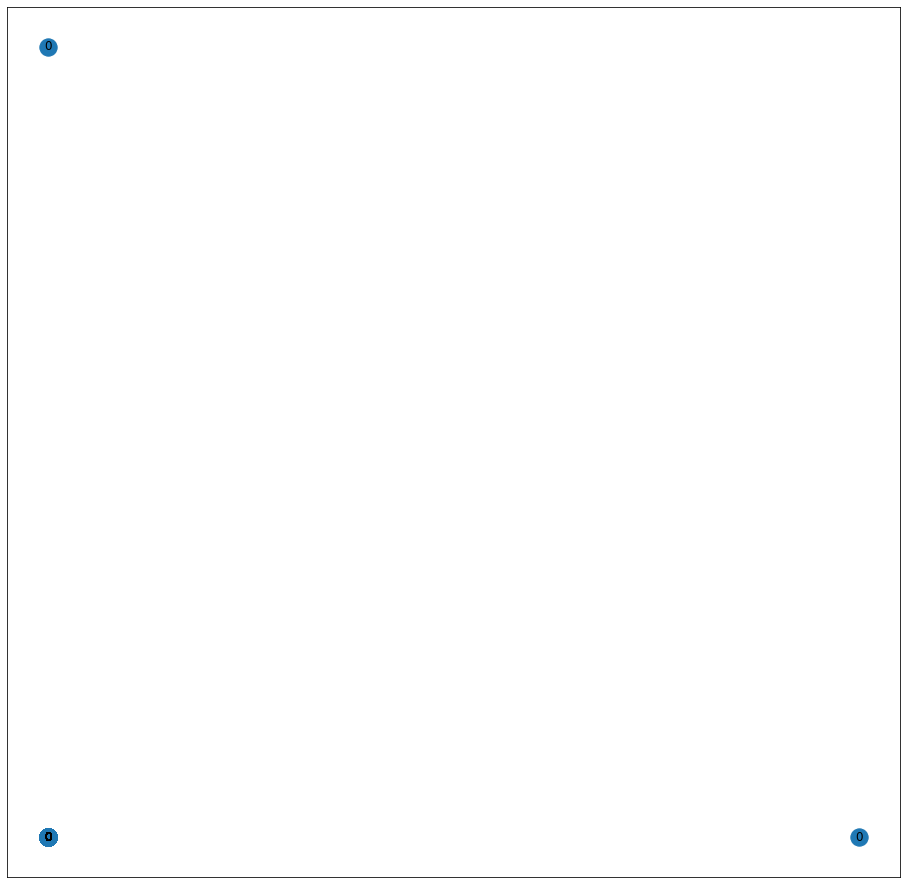

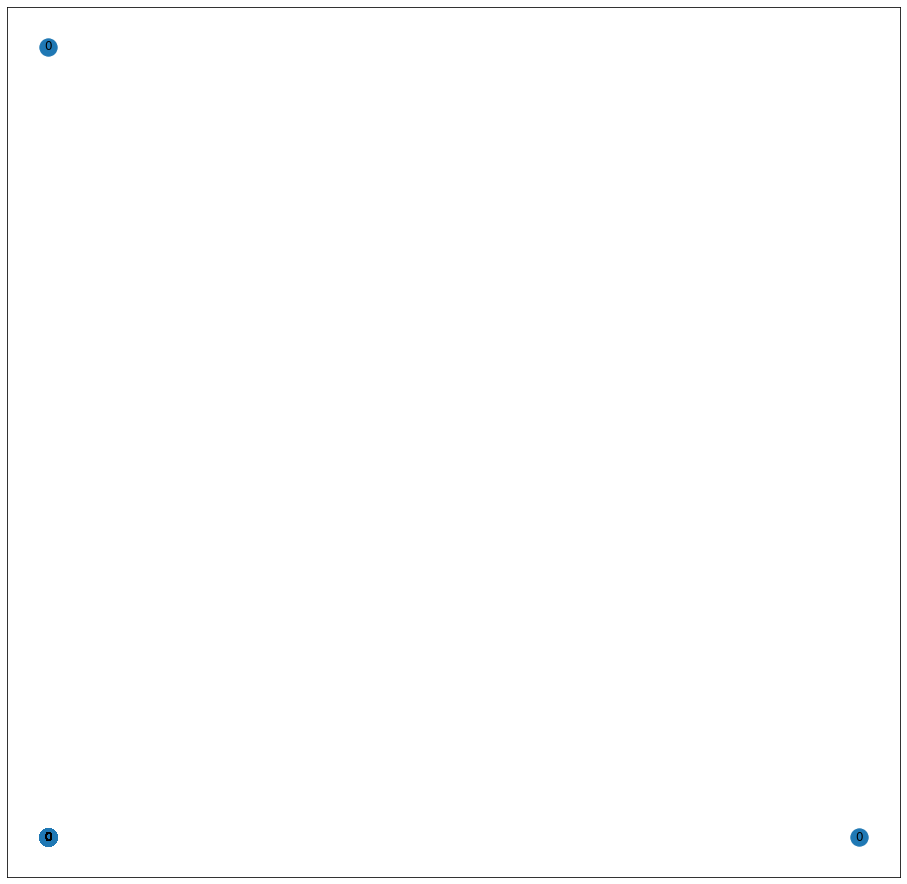

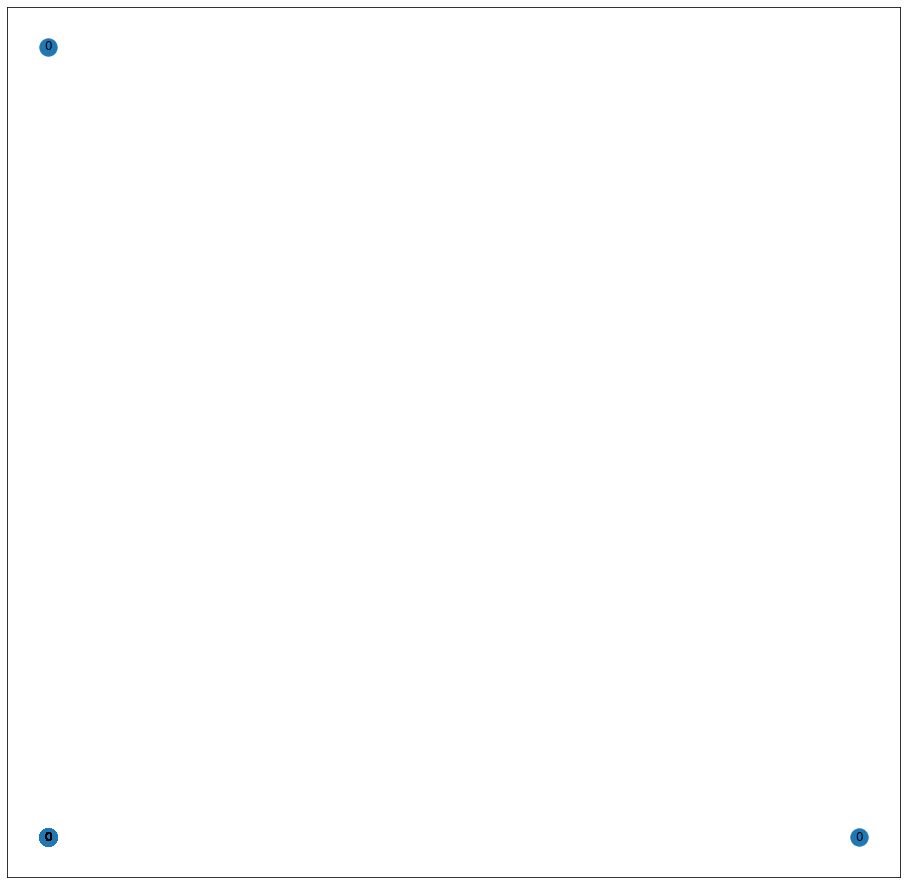

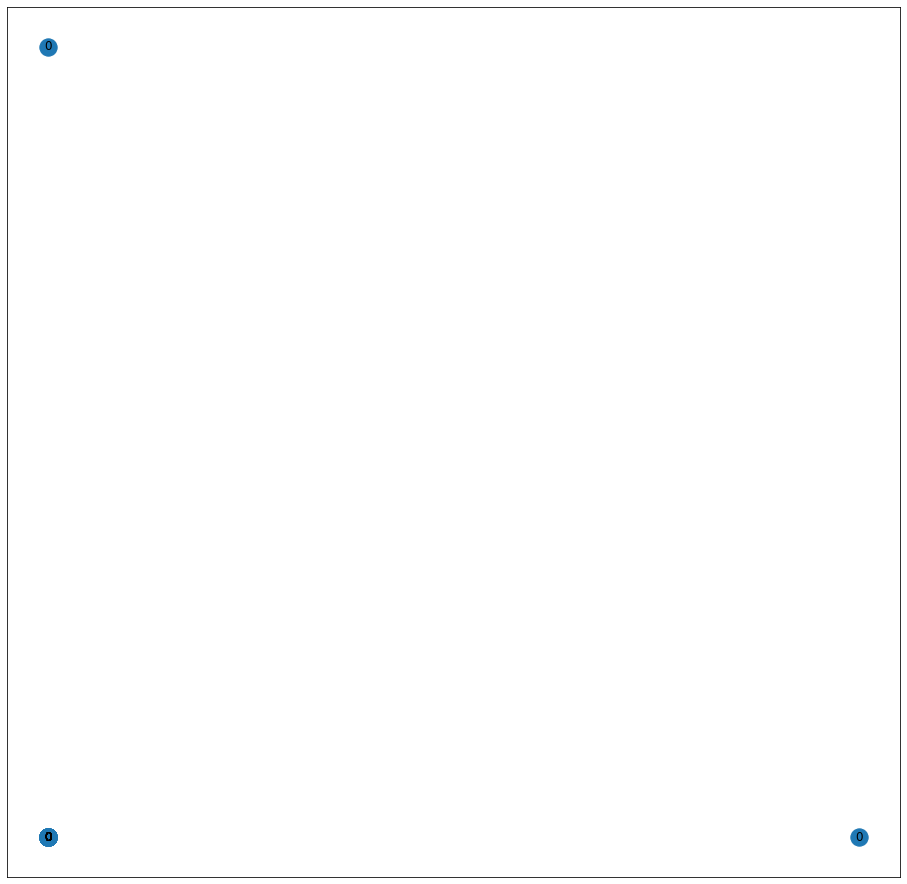

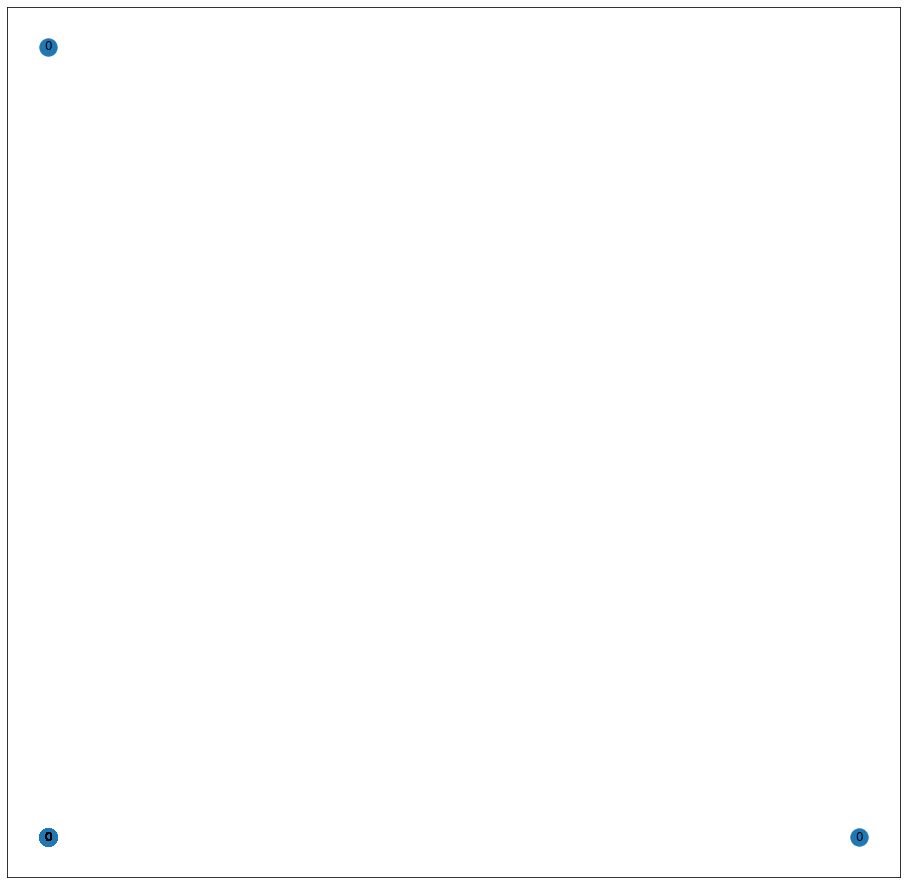

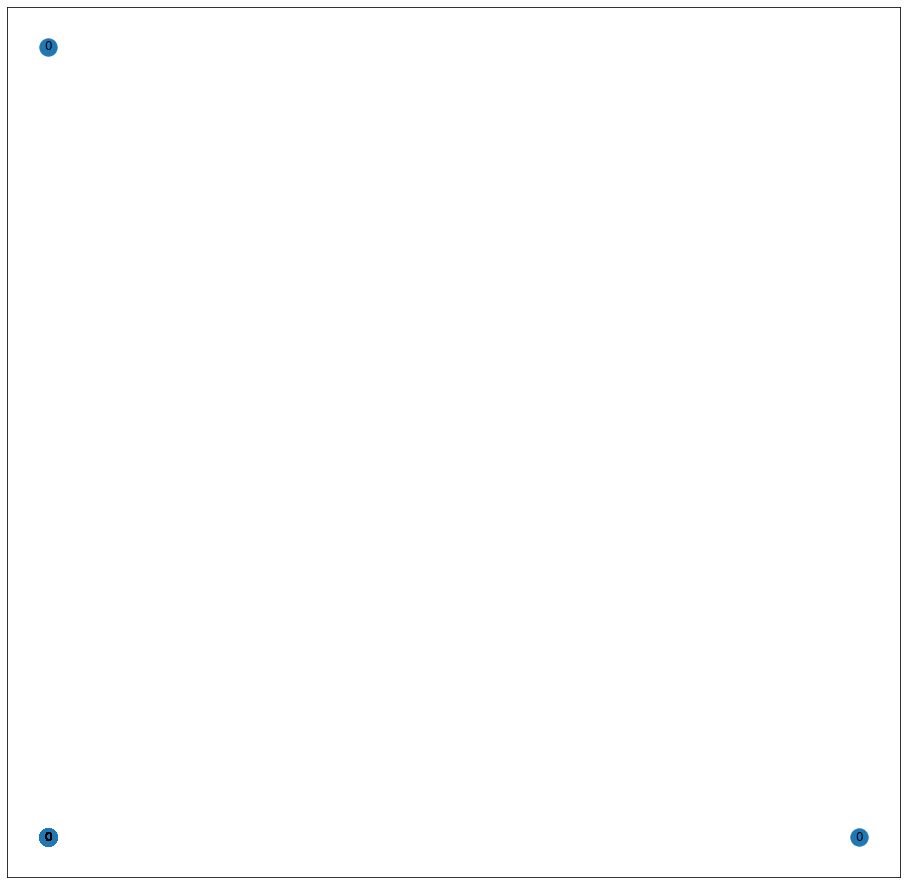

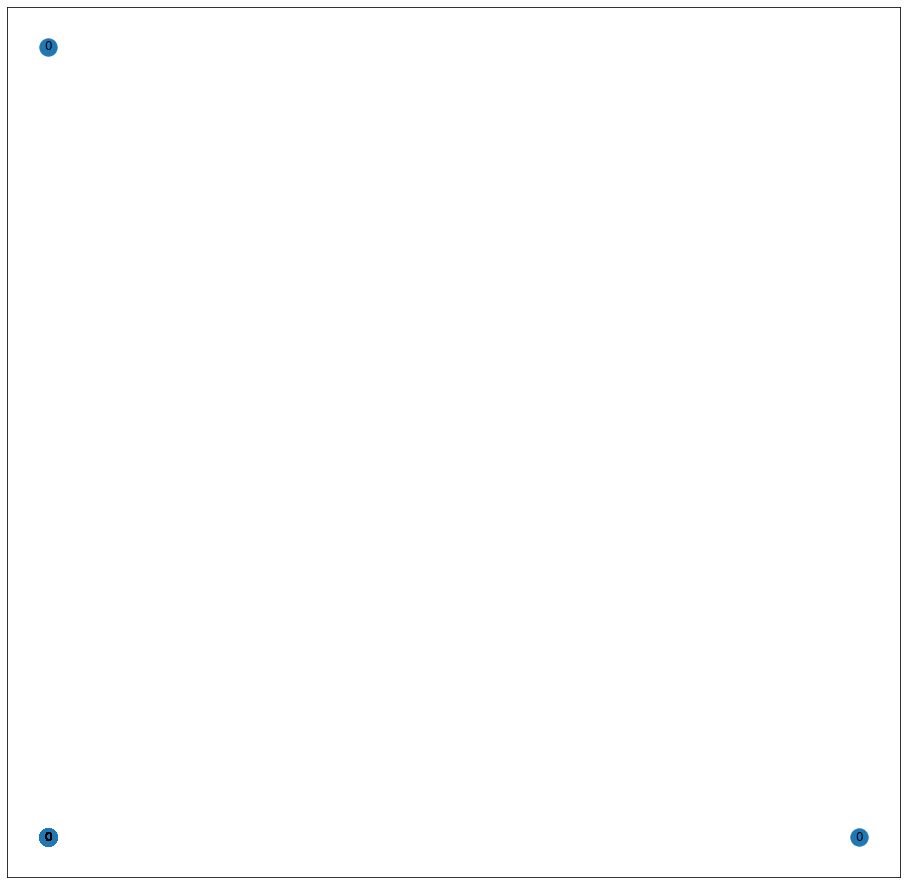

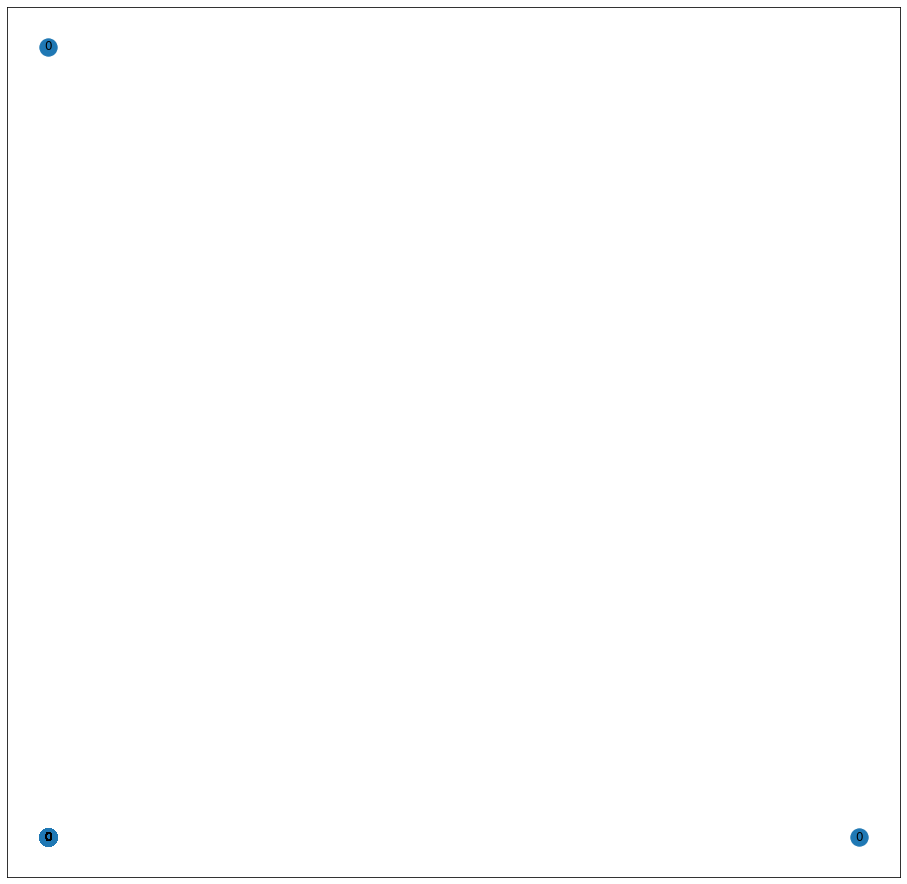

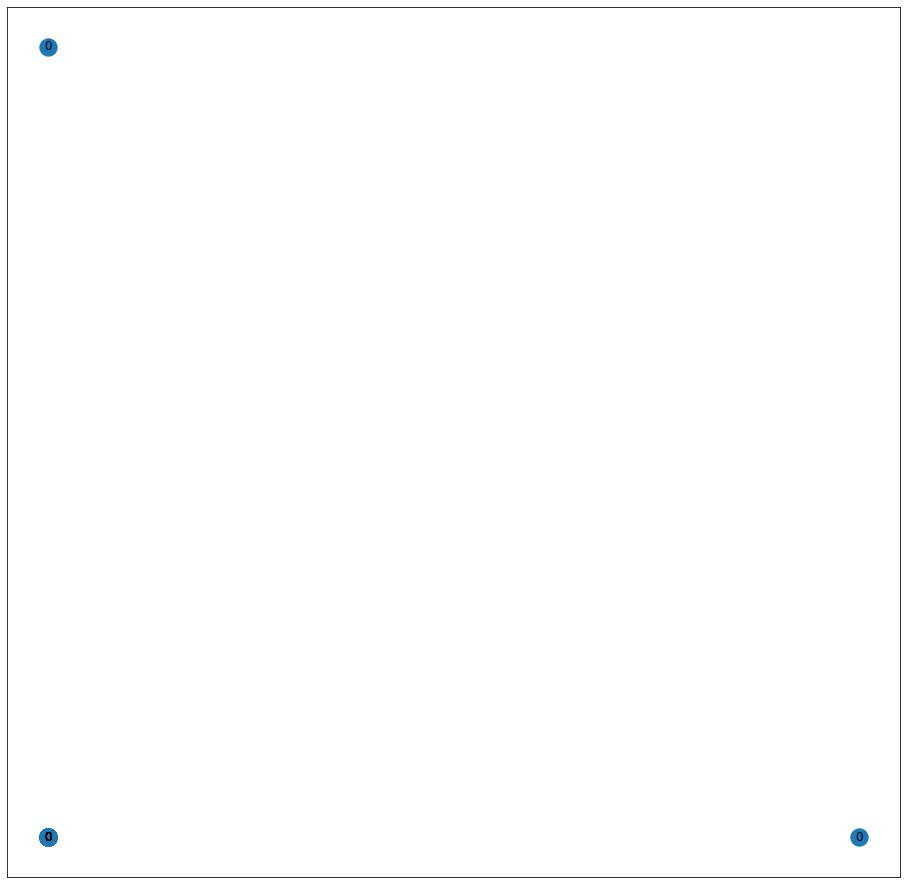

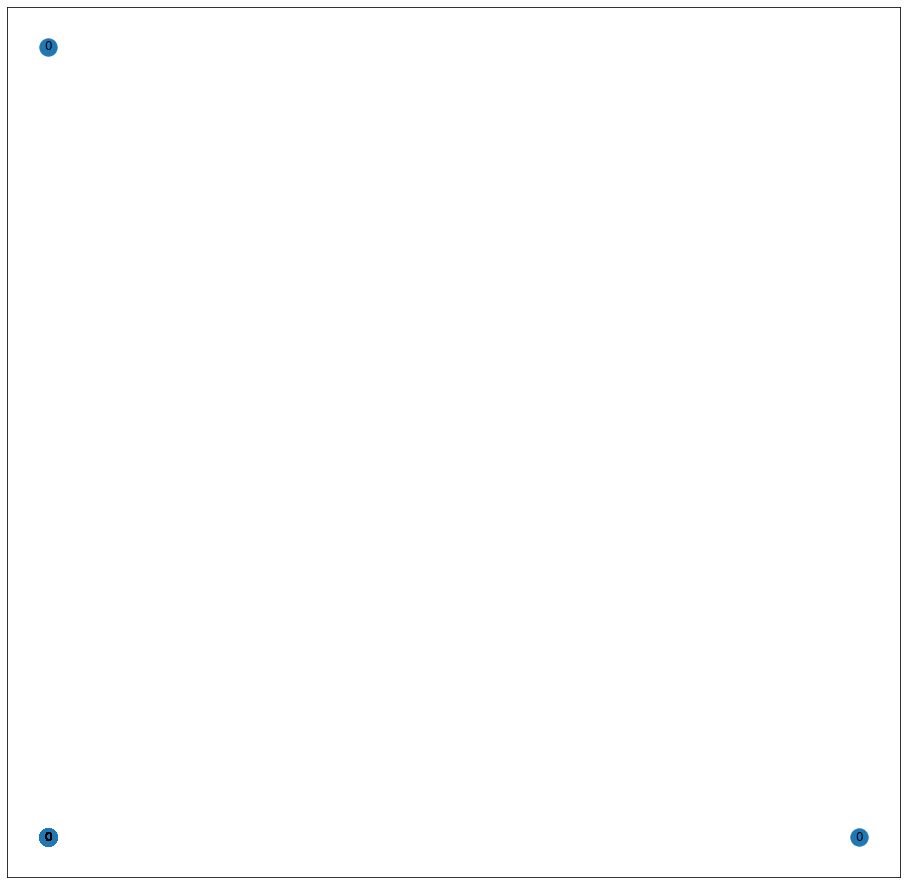

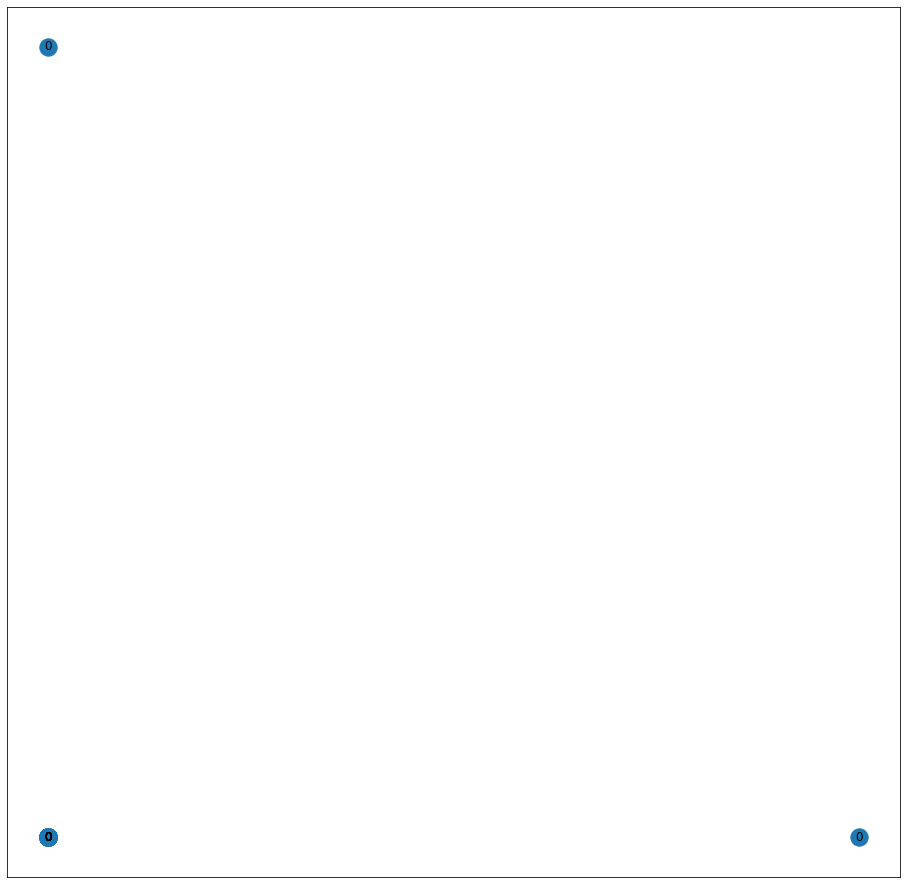

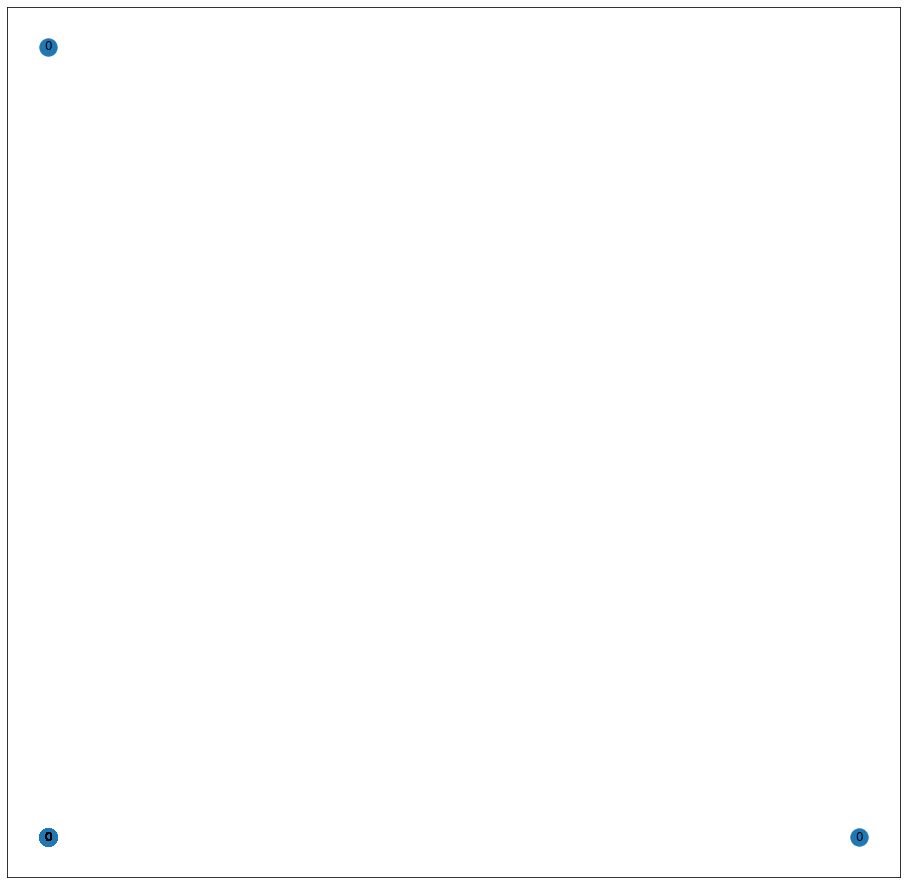

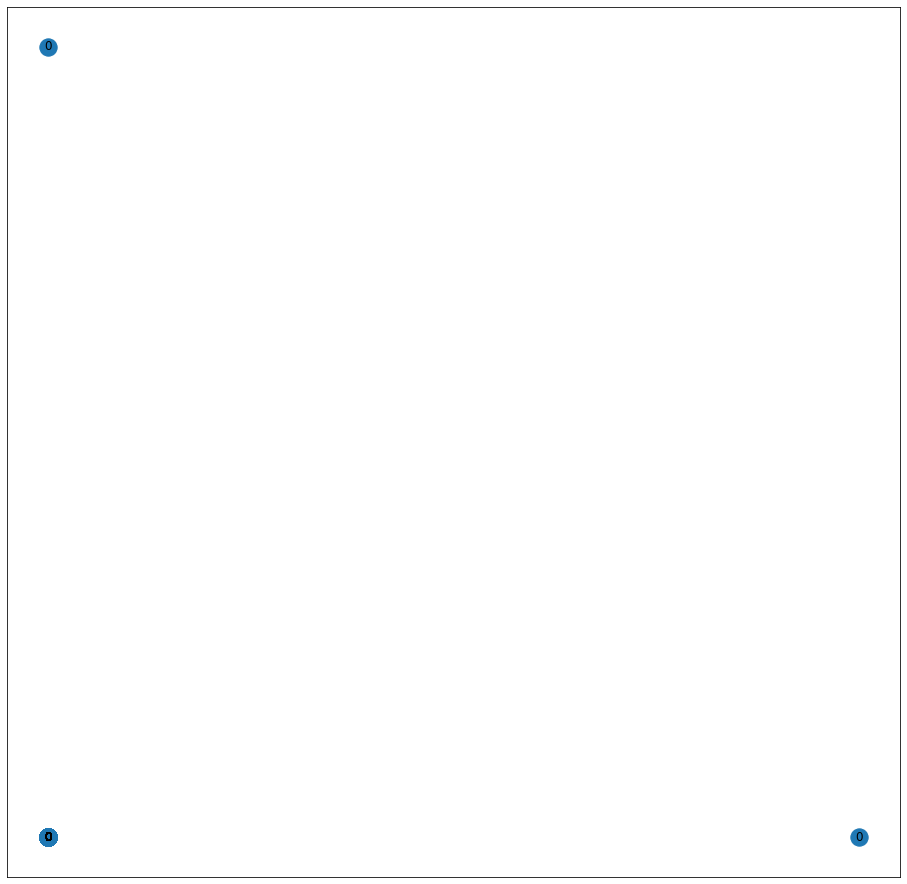

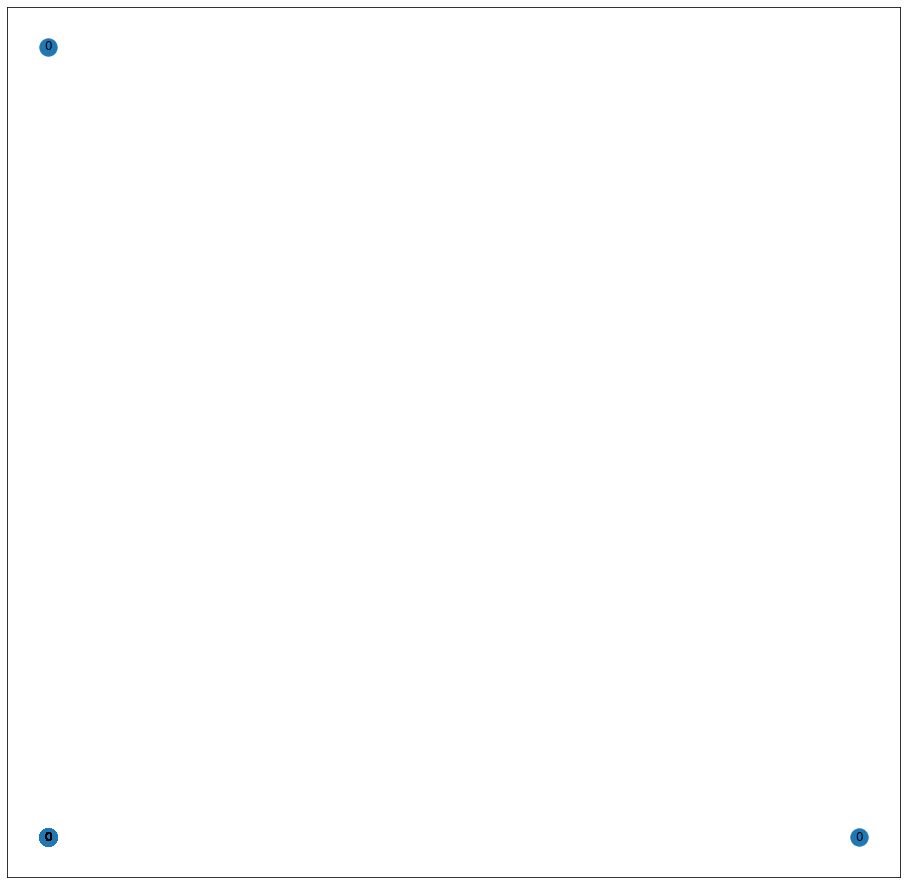

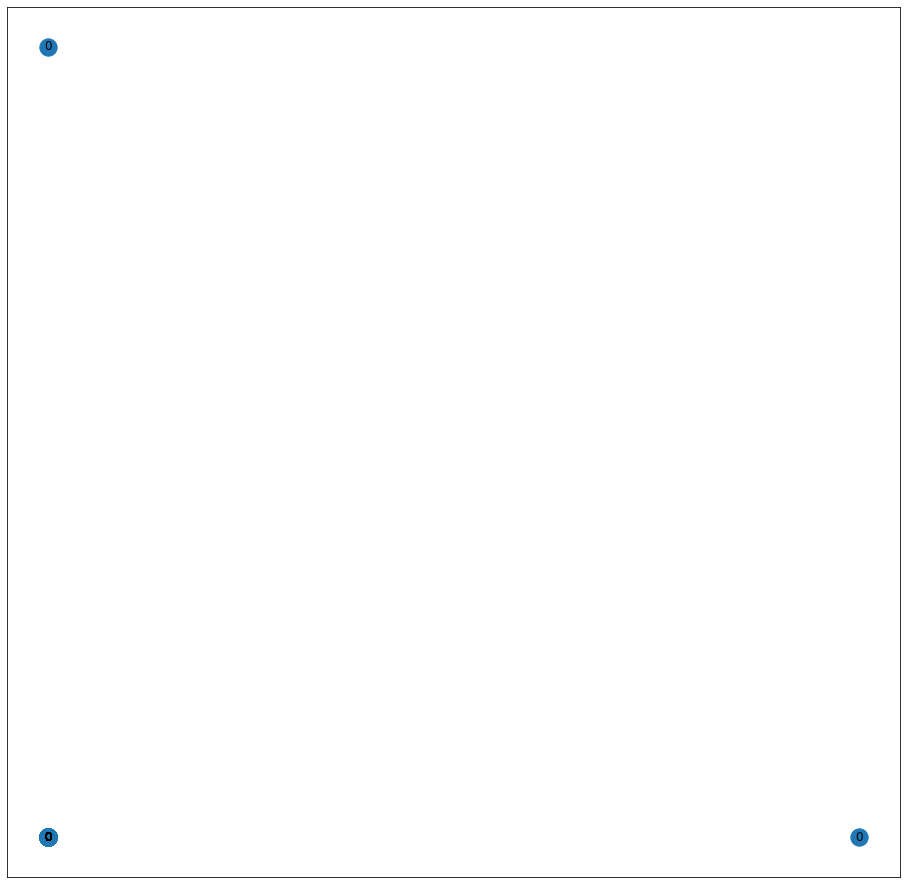

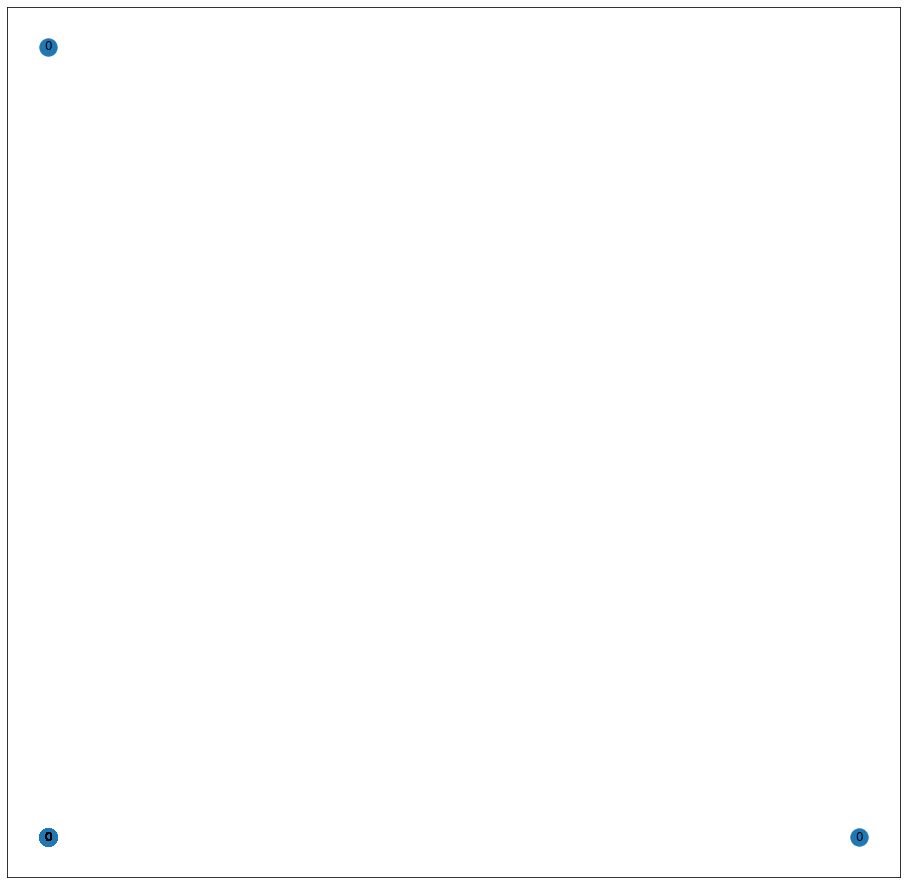

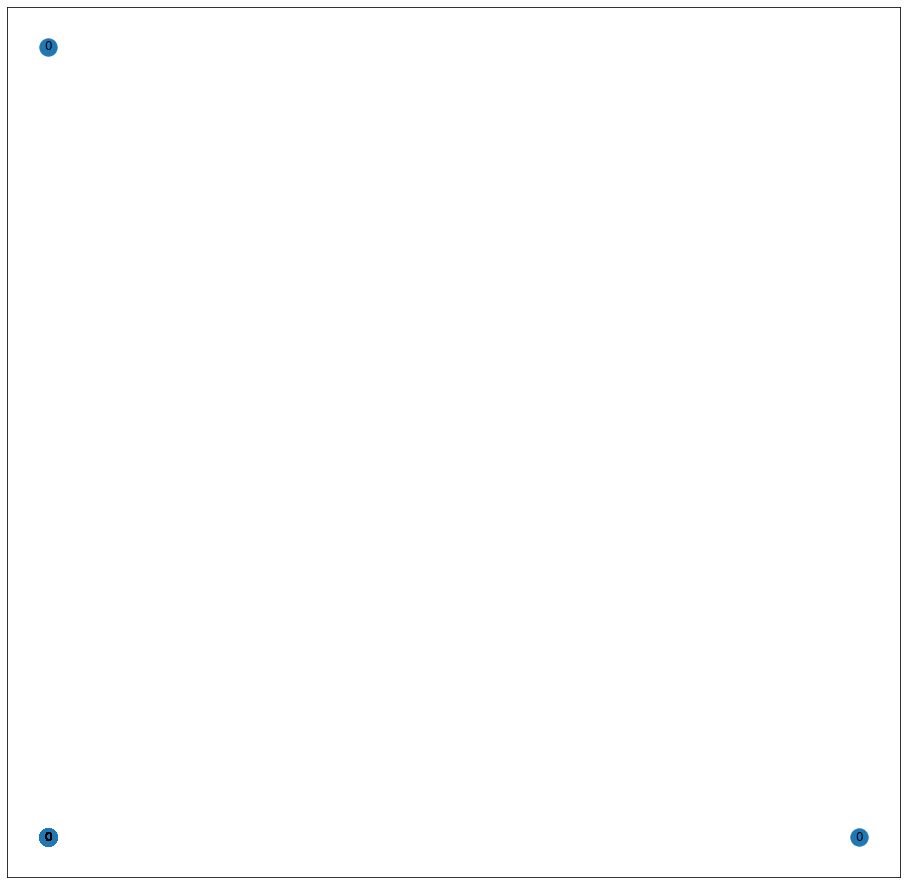

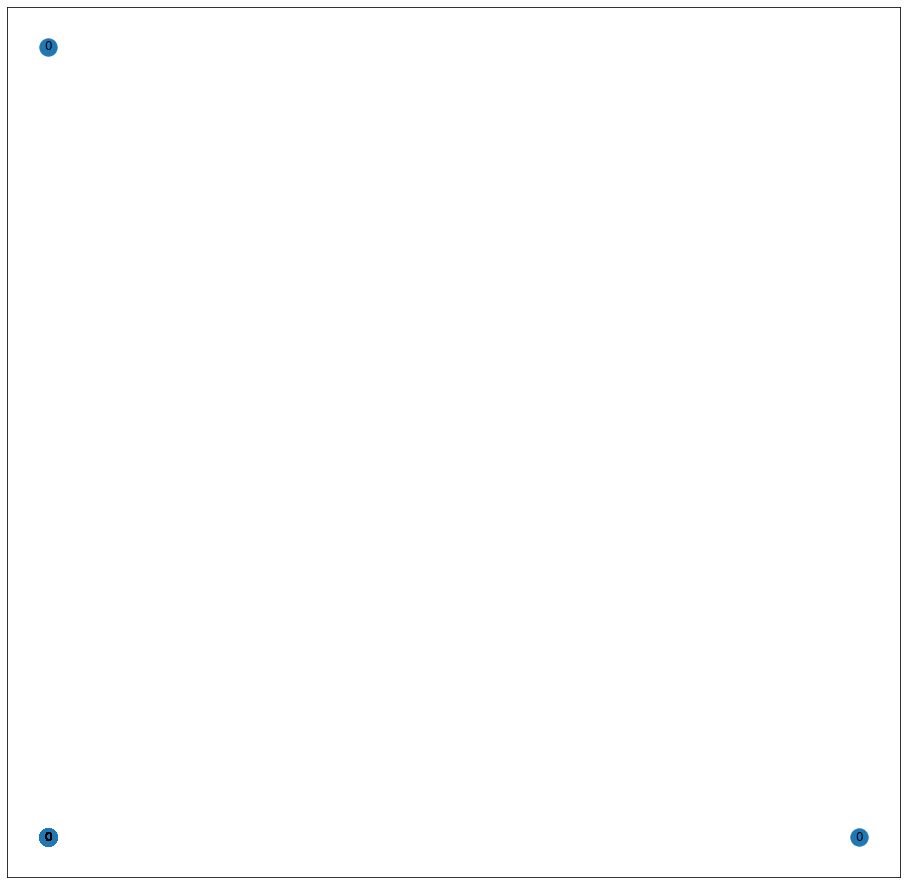

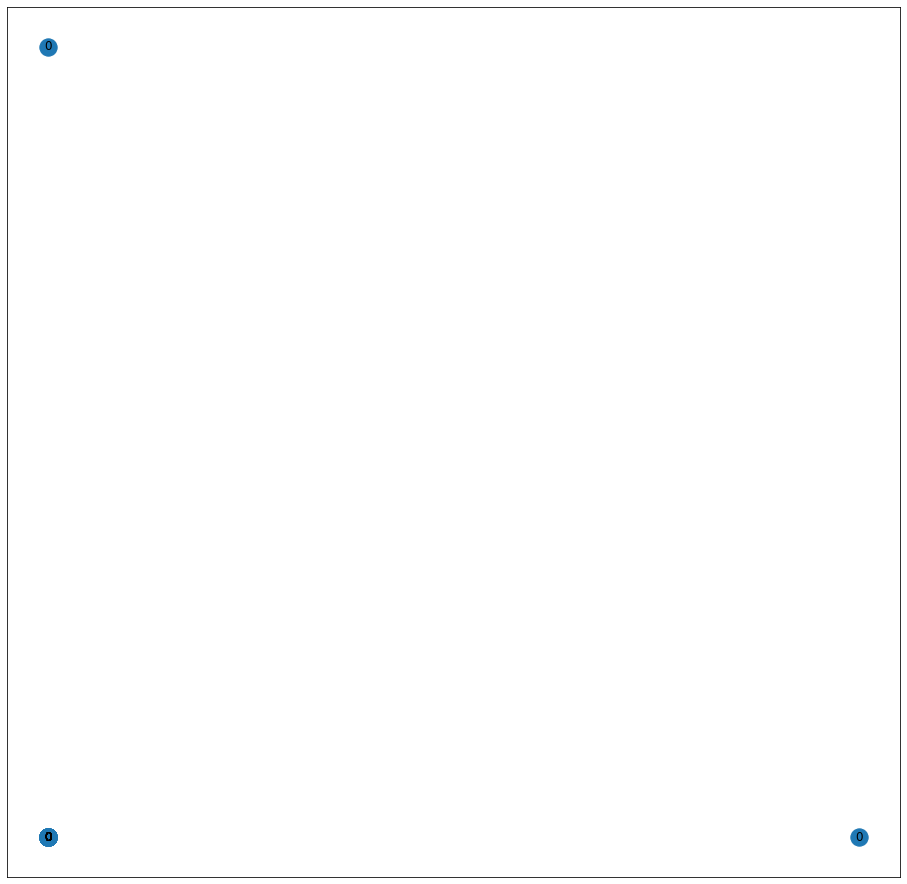

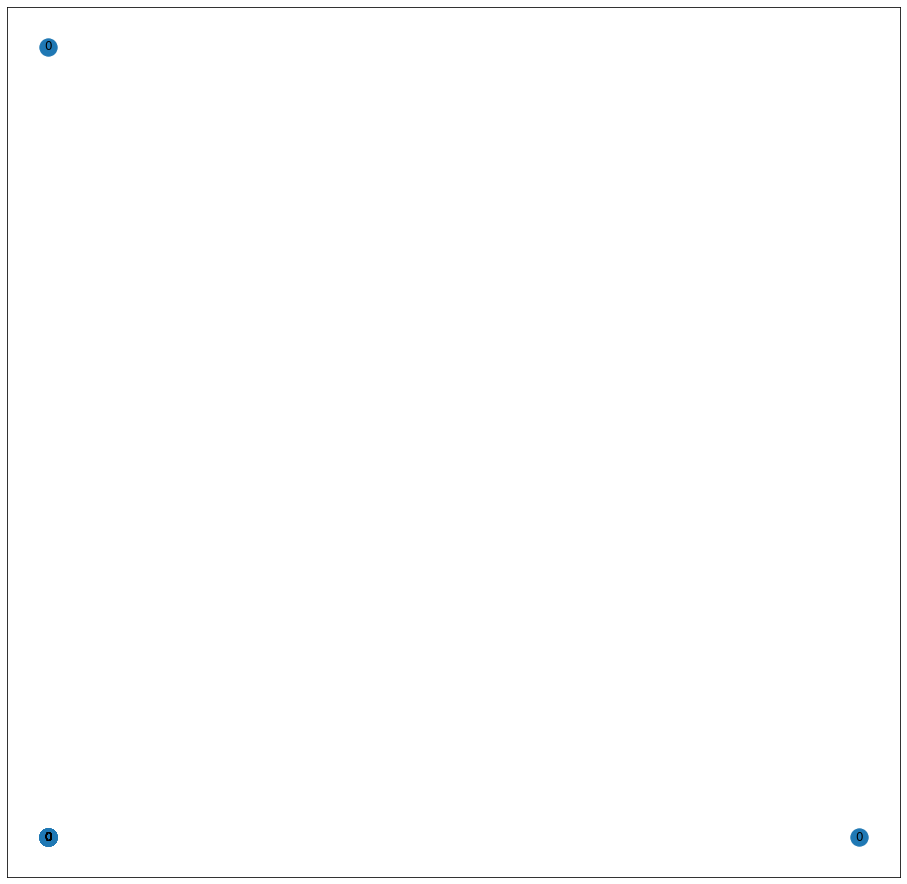

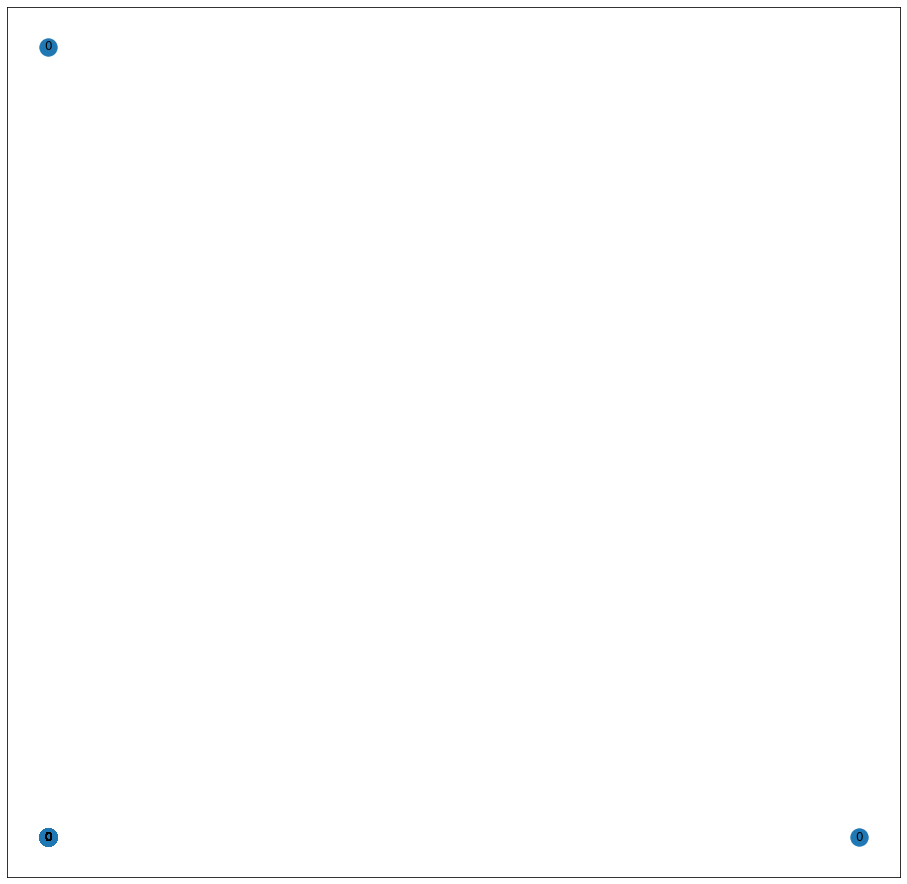

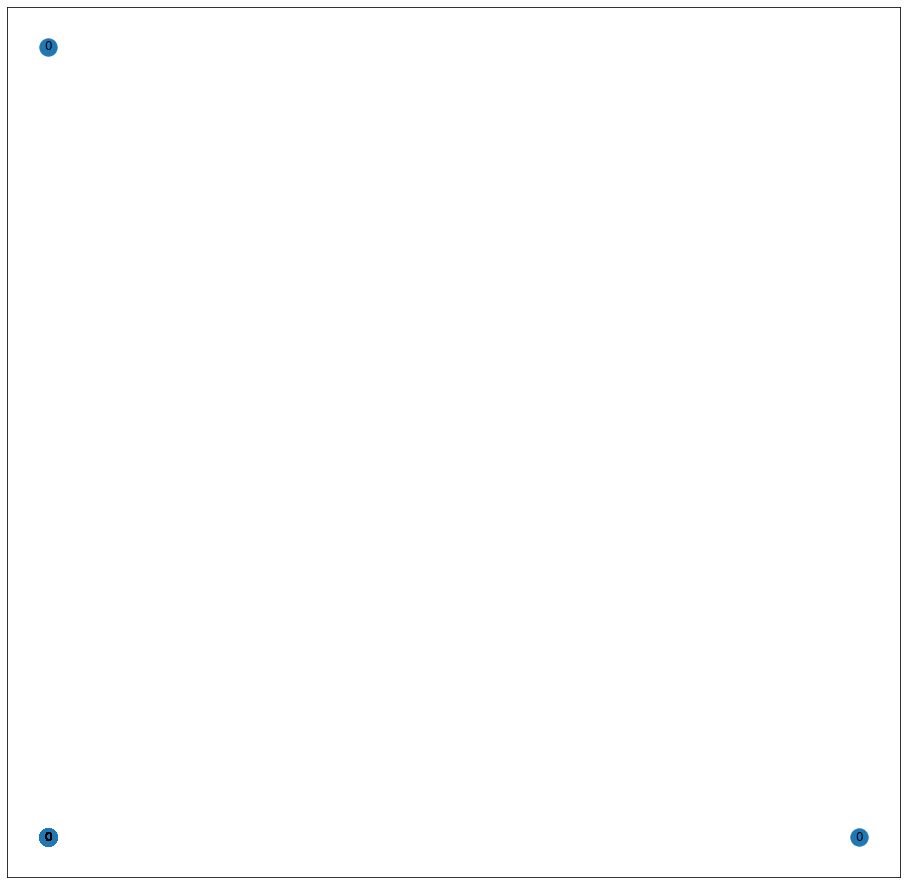

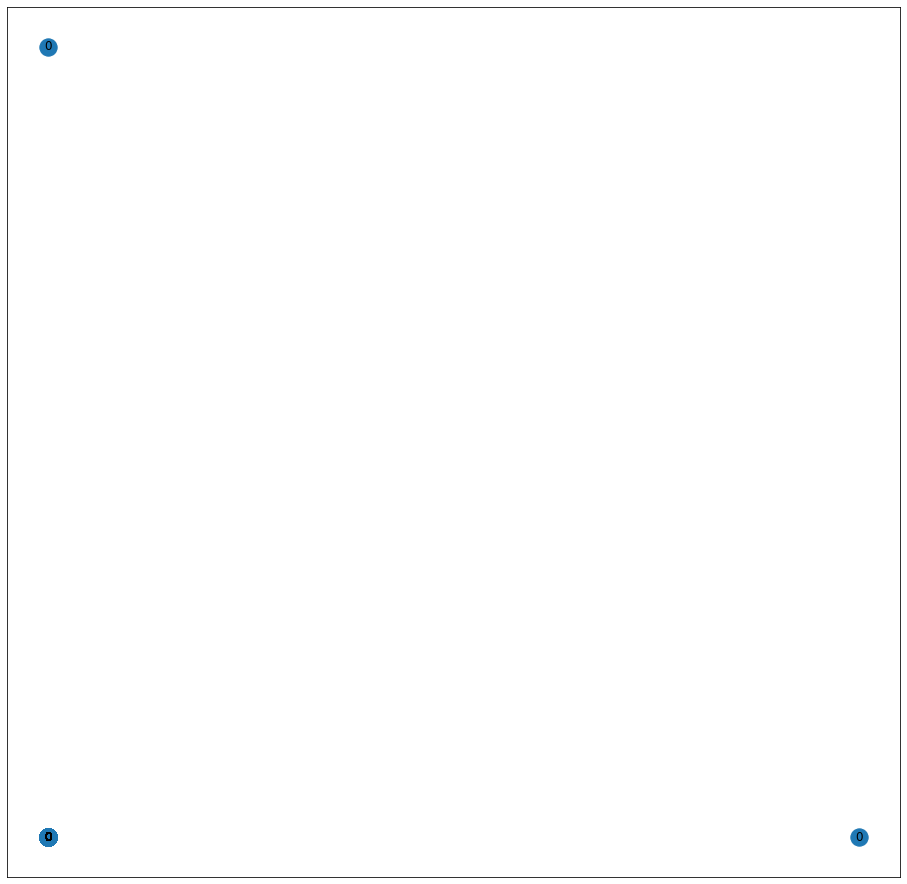

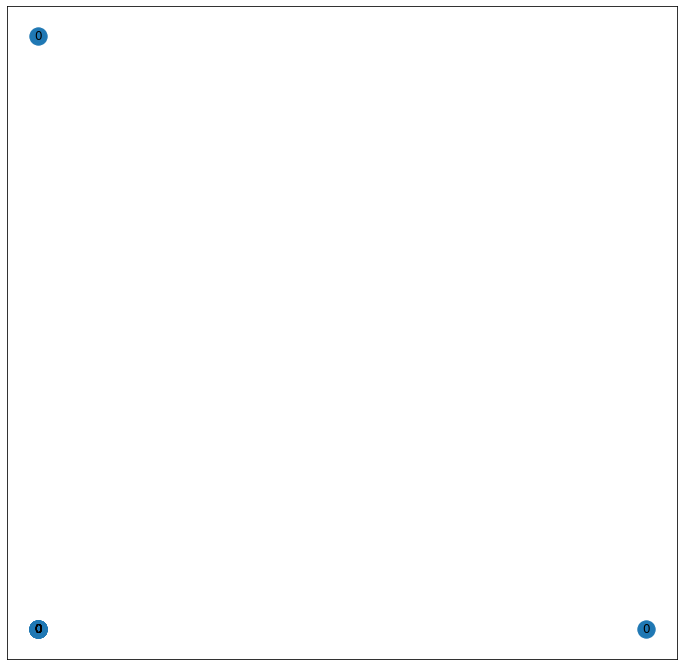

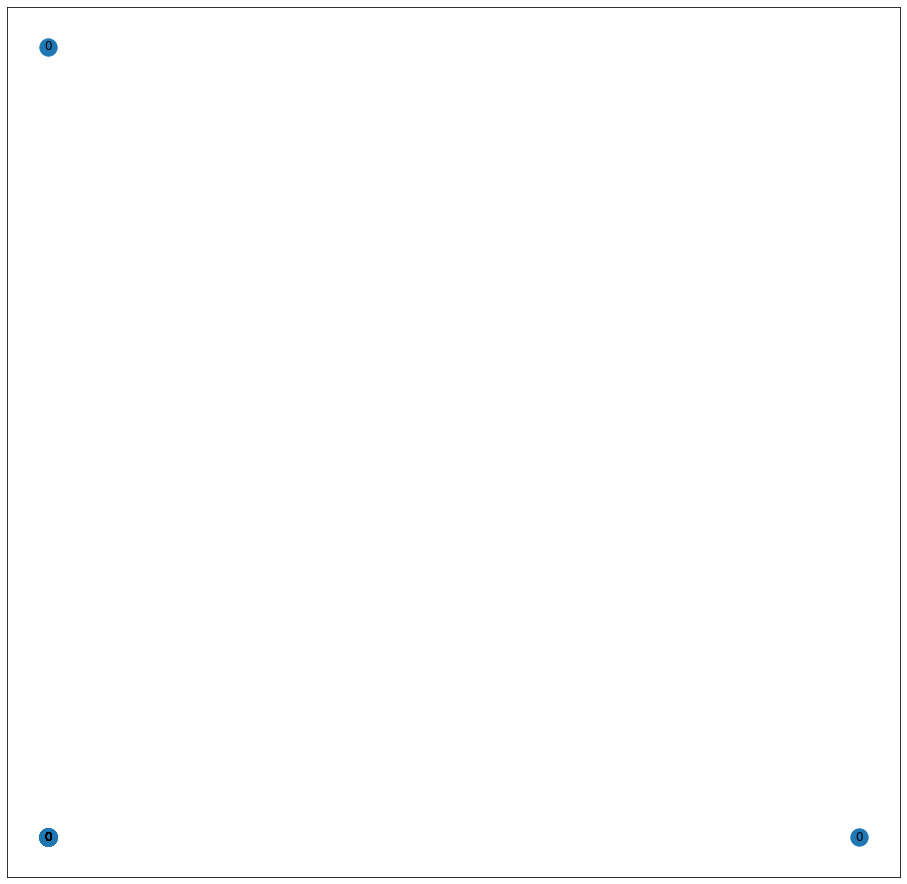

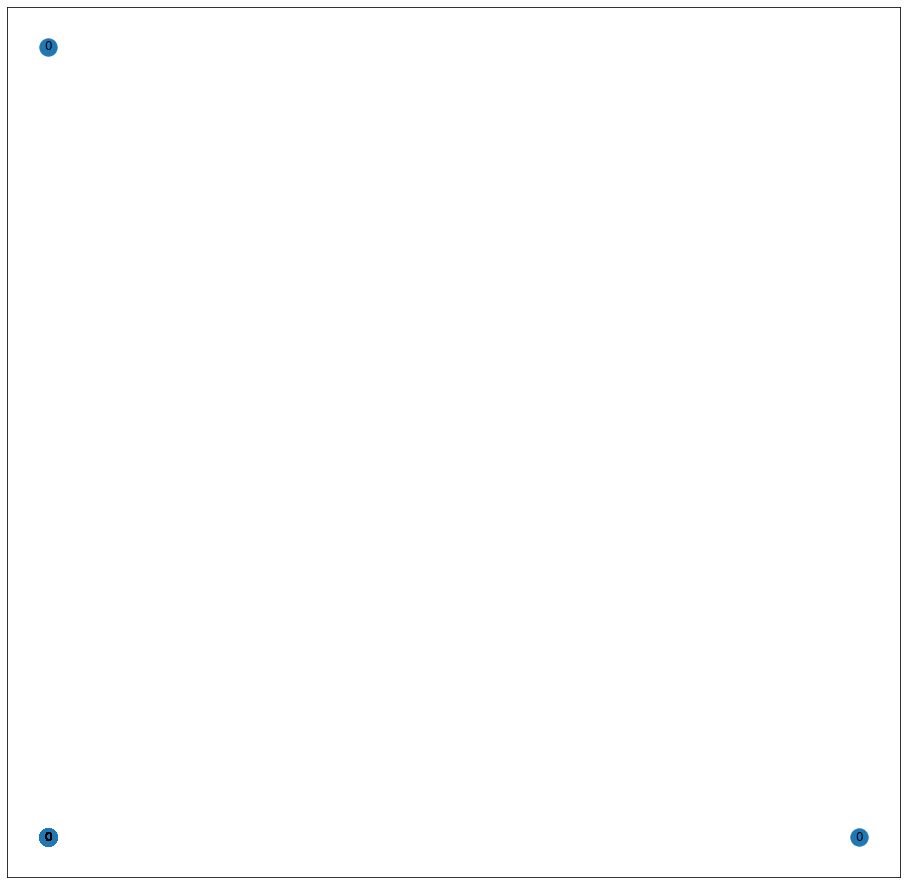

In [5]:
for g in gs.graphs.values():
    g.plot()